# Figure 1

Flow chart

# Figure 2


## A. The outline of prompts used in the research. 
Complete outside


## B. The distribution of token counts of prompts (with data not public)

In [916]:
# Data source: Center 1 and Center 2
# Note: The actual prompts are not publicly available due to privacy concerns.
# This code serves as an example of how the token count analysis would be performed.
import json
data_path_center1 = "../../prompts/center1/comprehensive_prompts.json" # not public
data_path_center2 = "../../prompts/center2/comprehensive_prompts.json" # not public

with open(data_path_center1, 'r') as f:
    prompts_center1 = json.load(f)

with open(data_path_center2, 'r') as f:
    prompts_center2 = json.load(f)

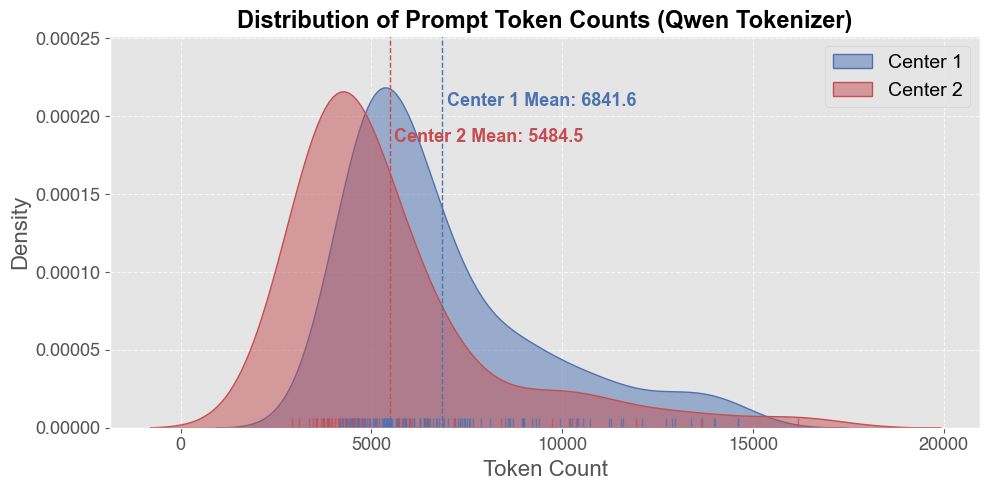

Center 1 (ZS) 统计信息:
平均token数: 6841.6
中位数token数: 5895.5
最小token数: 3751
最大token数: 14606
标准差: 2557.2

Center 2 (JM) 统计信息:
平均token数: 5484.5
中位数token数: 4524.0
最小token数: 2933
最大token数: 16181
标准差: 2717.4


In [922]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import AutoTokenizer

# Set Arial font
plt.rcParams['font.family'] = 'Arial'

# Load Qwen tokenizer
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B", trust_remote_code=True)

# Calculate token counts for each prompt
token_counts_zs = []
for patient_id, prompt in prompts_center1.items():
    # Use Qwen tokenizer to count tokens
    tokens = tokenizer.encode(prompt)
    token_counts_zs.append(len(tokens))

# Calculate token counts for JM dataset
token_counts_jm = []
for patient_id, prompt in prompts_center2.items():
    tokens = tokenizer.encode(prompt)
    token_counts_jm.append(len(tokens))

# Set plot style
plt.style.use('ggplot')

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot density curve for ZS dataset
sns.kdeplot(token_counts_zs, color='#4C72B0', linewidth=1, fill=True, alpha=0.5, ax=ax, label='Center 1')

# Plot density curve for JM dataset
sns.kdeplot(token_counts_jm, color='#C44E52', linewidth=1, fill=True, alpha=0.5, ax=ax, label='Center 2')

# Add ZS mean line
mean_tokens_compreh = np.mean(token_counts_zs)
ax.axvline(mean_tokens_compreh, color='#4C72B0', linestyle='--', linewidth=1)
ax.text(mean_tokens_compreh*1.02, ax.get_ylim()[1]*0.9, f'Center 1 Mean: {mean_tokens_compreh:.1f}', 
        color='#4C72B0', fontweight='bold', fontname='Arial', fontsize=13)

# Add JM mean line
mean_tokens_jm = np.mean(token_counts_jm)
ax.axvline(mean_tokens_jm, color='#C44E52', linestyle='--', linewidth=1)
ax.text(mean_tokens_jm*1.02, ax.get_ylim()[1]*0.8, f'Center 2 Mean: {mean_tokens_jm:.1f}', 
        color='#C44E52', fontweight='bold', fontname='Arial', fontsize=13)

# Set chart style
ax.set_title('Distribution of Prompt Token Counts (Qwen Tokenizer)', fontsize=17, fontweight='bold', fontname='Arial')
ax.set_xlabel('Token Count', fontsize=16, fontname='Arial')
ax.set_ylabel('Density', fontsize=16, fontname='Arial')
ax.grid(True, linestyle='--', alpha=0.7)

# Add rug plot for data points
sns.rugplot(token_counts_zs, color='#4C72B0', alpha=0.7, ax=ax)
sns.rugplot(token_counts_jm, color='#C44E52', alpha=0.7, ax=ax)

# Add legend
ax.legend(fontsize=14)

# Set tick label font
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('Helvetica')
    label.set_fontsize(13)

# Adjust layout and save as PDF
plt.tight_layout()
plt.savefig('figures/figure1B_prompt_token_distribution.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics for both datasets
print("Center 1 (ZS) Statistics:")
print(f"Average token count: {mean_tokens_compreh:.1f}")
print(f"Median token count: {np.median(token_counts_zs):.1f}")
print(f"Minimum token count: {min(token_counts_zs)}")
print(f"Maximum token count: {max(token_counts_zs)}")
print(f"Standard deviation: {np.std(token_counts_zs):.1f}")

print("\nCenter 2 (JM) Statistics:")
print(f"Average token count: {mean_tokens_jm:.1f}")
print(f"Median token count: {np.median(token_counts_jm):.1f}")
print(f"Minimum token count: {min(token_counts_jm)}")
print(f"Maximum token count: {max(token_counts_jm)}")
print(f"Standard deviation: {np.std(token_counts_jm):.1f}")


## C. Display an example of no think label output format
Complete outside


## D. Evaluations of different models for no think label

In [5]:
# Model name match
name_match = {
    "claude3_7_reasoning_comprehensive_nothink": "Claude 3.7 with think",
    "ds_v3_comprehensive_nothink": "Deepseek V3",
    "grok3_comprehensive_nothink": "Grok 3",
    "human": "Human",
    "qwen3reasoning_30_comprehensive_nothink": "Qwen 3 30B with think",
    "qwen3_235_comprehensive_nothink": "Qwen 3 235B",
    "gpt4_1_comprehensive_nothink": "GPT 4.1",
    "ds_r1_comprehensive_nothink": "Deepseek R1",
    "gemini_2_5_flash_comprehensive_nothink": "Gemini 2.5 Flash",
    "gemini_2_5_pro_comprehensive_nothink": "Gemini 2.5 Pro",
    "qwen3_30_comprehensive_nothink": "Qwen 3 30B",
    "o1_comprehensive_nothink": "O1",
    "claude3_7_comprehensive_nothink": "Clauden Sonnet 3.7",
    "qwen3reasoning_235_comprehensive_nothink": "Qwen 3 235B with think",
    "grok3_mini_comprehensive_nothink": "Grok 3 Mini"
}

In [6]:
# Reasoning models
reasoning_models = [
    "claude3_7_reasoning_comprehensive_nothink",
    "qwen3reasoning_30_comprehensive_nothink",
    "qwen3reasoning_235_comprehensive_nothink",
    "grok3_mini_comprehensive_nothink",
    "o1_comprehensive_nothink",
    "ds_r1_comprehensive_nothink",
    "gemini_2_5_pro_comprehensive_nothink",
    "gemini_2_5_flash_comprehensive_nothink",
]

In [7]:
def plot_model_performance_nothink(evaluation, name_match, reasoning_models, save_path='figures/figure1D_no_think.pdf'):
    """
    Plots a comparison of model performance, including F1 Score, Recall, and Precision.
    
    Parameters:
    evaluation: DataFrame, contains model evaluation results
    name_match: dict, dictionary for mapping model names
    reasoning_models: list, list of reasoning models
    save_path: str, path to save the plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Set plot style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Color scheme
    reasoning_color = '#4C72B0'  
    other_color = '#55A868'   
    human_color = '#FF7F0E' 
    
    # Create three subplots
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    fig.subplots_adjust(hspace=0.3)
    
    metrics = ['F1_score', 'Recall', 'Precision']
    titles = ['F1 Score', 'Recall', 'Precision']
    
    # Filter models containing "nothink" and "human"
    nothink_evaluation = evaluation[evaluation['Models'].isin(name_match.keys()) | (evaluation['Models'] == 'human')]
    
    # Use the filtered data
    evaluation = nothink_evaluation.reset_index(drop=True)
    
    # Sort data (descending by F1 score)
    sorted_indices = evaluation['F1_score'].argsort()[::-1]
    sorted_evaluation = evaluation.iloc[sorted_indices].reset_index(drop=True)
    
    # Use the name_match dictionary to map model names
    model_names = [name_match.get(model, model) for model in sorted_evaluation['Models'].tolist()]
    
    # Plot the three subplots
    for i, (metric, title) in enumerate(zip(metrics, titles)):
        # Create bar chart, choosing color based on whether the model is in reasoning_models or is human
        bars = axes[i].bar(np.arange(len(model_names)), sorted_evaluation[metric], 
                            color=[human_color if model == 'human' else 
                                   reasoning_color if model in reasoning_models else other_color 
                                   for model in sorted_evaluation['Models']], 
                            alpha=0.8,
                            width=0.7)
        
        # Add numerical labels on the bars, retaining 3 decimal places
        for bar in bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                         f'{height:.3f}', ha='center', va='bottom', fontsize=10, rotation=0)
        
        # Set chart style
        axes[i].set_title(title, fontsize=16, fontweight='bold')
        axes[i].set_ylabel('Score', fontsize=14)
        axes[i].set_ylim(0, 1.0)
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
        # Find the position and value of 'human'
        if 'human' in sorted_evaluation['Models'].tolist():
            human_index = sorted_evaluation['Models'].tolist().index('human')
            human_value = sorted_evaluation[metric].iloc[human_index]
            
            # Add a horizontal dashed line for the human value
            axes[i].axhline(y=human_value, color='#FF7F0E', linestyle='--', linewidth=2, alpha=0.8)
    
    # Set x-axis labels on the last subplot
    axes[2].set_xticks(np.arange(len(model_names)))
    axes[2].set_xticklabels(model_names, rotation=45, ha='right', fontsize=14)
    axes[2].set_xlabel('Models', fontsize=14)
    
    # Set larger y-axis tick font size
    for ax in axes:
        ax.tick_params(axis='y', labelsize=14)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=reasoning_color, label='Reasoning Models', alpha=0.8),
        Patch(facecolor=other_color, label='General Models', alpha=0.8),
        Patch(facecolor=human_color, label='Human', alpha=0.8)
    ]
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.94), fontsize=12)
    
    # Add overall title
    fig.suptitle('')
    
    # Adjust layout and display
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig, axes


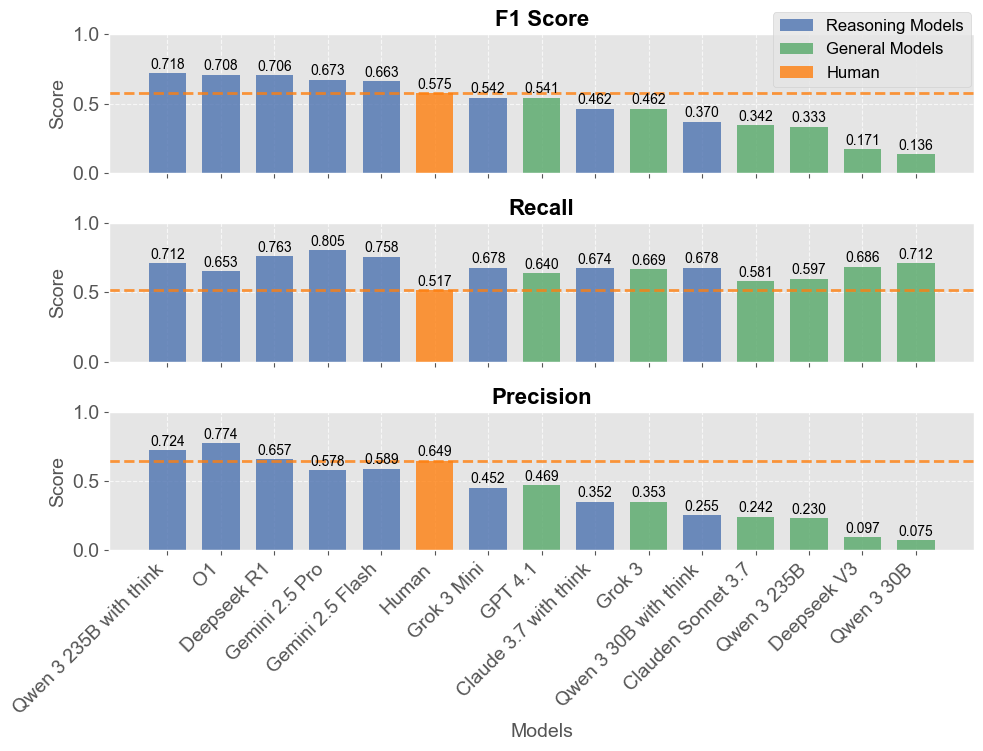

In [12]:
# Read data
evaluation = pd.read_csv("evaluation_dataframes/evaluation_micro_center1.csv")

# Plot
fig, axes = plot_model_performance_nothink(evaluation, name_match, reasoning_models, save_path='figures/figure1D_no_think.pdf')

### Appendix 1

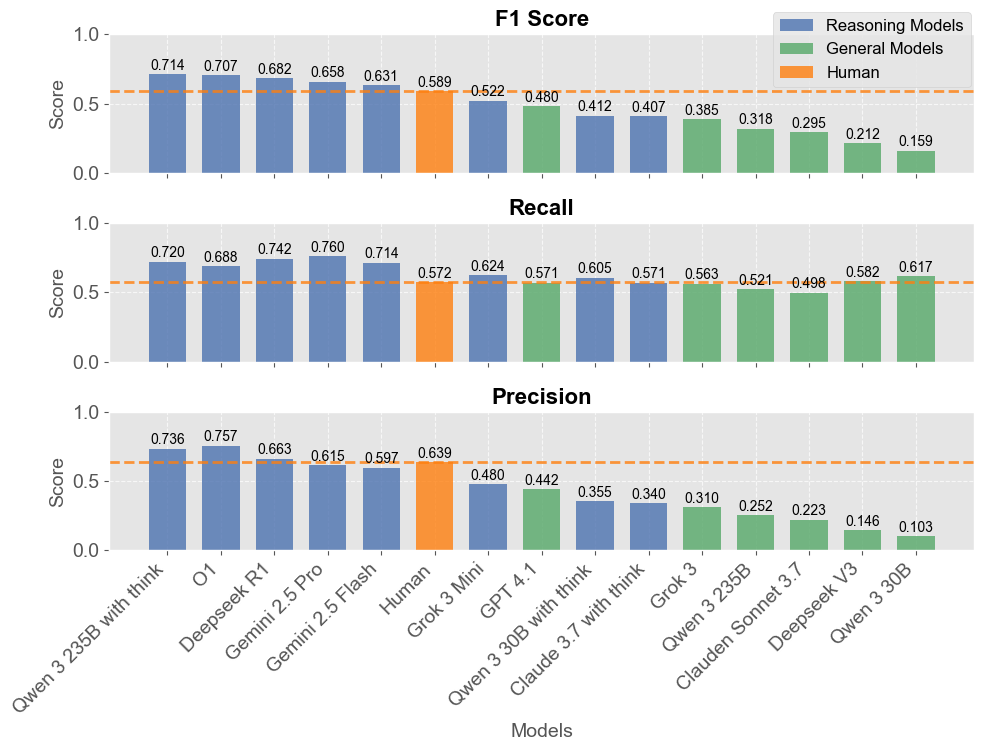

In [14]:
# Read data
evaluation = pd.read_csv("evaluation_dataframes/evaluation_macro_center1.csv")

# Plot
fig, axes = plot_model_performance_nothink(evaluation, name_match, reasoning_models, save_path="figures/Appedix_fig1_no_think_macro.pdf")

## E. Display the output structure with think label
Completed outside


## F. Evaluations of different models for having think label

In [15]:
def plot_model_performance_hasthink(evaluation, name_match, reasoning_models, save=True, save_path='V3/results/for_plot/model_comparison_with_without_nothink.png'):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.patches import Patch

    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'

    # Color scheme
    reasoning_color = '#4C72B0'  
    other_color = '#55A868'
    human_color = '#FF7F0E'

    # Collect name pairs: one with 'nothink', one without
    model_pairs = []
    nothink_models = []
    original_models = []

    for model in evaluation['Models']:
        if model in name_match.keys() and 'human' not in model.lower():
            nothink_models.append(model)
            # Find the corresponding model without 'nothink'
            original_model = model.replace('_nothink', '')
            
            # Check if the original model exists in the evaluation data
            if original_model not in evaluation['Models'].values:
                print(f"Warning: Model {original_model} not found in evaluation data")
                continue
            if original_model in evaluation['Models'].values:
                original_models.append(original_model)
                model_pairs.append((original_model, model))

    # Create a new DataFrame containing comparison data
    comparison_data = []
    for original, nothink in model_pairs:
        original_data = evaluation[evaluation['Models'] == original].iloc[0]
        nothink_data = evaluation[evaluation['Models'] == nothink].iloc[0]
        
        # Extract base model name (using name_match dictionary)
        base_name = name_match.get(nothink, original.replace('_original', ''))
        
        comparison_data.append({
            'Model': base_name,
            'Type': 'Output CoT first',
            'Precision': original_data['Precision'],
            'Recall': original_data['Recall'],
            'F1_score': original_data['F1_score']
        })
        
        comparison_data.append({
            'Model': base_name,
            'Type': 'Output result directly',
            'Precision': nothink_data['Precision'],
            'Recall': nothink_data['Recall'],
            'F1_score': nothink_data['F1_score']
        })

    # Create the new DataFrame
    comparison_df = pd.DataFrame(comparison_data)

    # Sort model names by F1 score
    model_f1_avg = comparison_df.groupby('Model')['F1_score'].mean().sort_values(ascending=False)
    model_order = model_f1_avg.index.tolist()
    comparison_df['Model'] = pd.Categorical(comparison_df['Model'], categories=model_order, ordered=True)
    comparison_df = comparison_df.sort_values(['Model', 'Type'])

    # Create three subplots
    fig, axes = plt.subplots(3, 1, figsize=(11, 8), sharex=True)
    fig.subplots_adjust(hspace=0.3)

    metrics = ['F1_score', 'Recall', 'Precision']
    titles = ['F1 Score', 'Recall', 'Precision']

    # Determine if a model is a reasoning model
    def is_reasoning_model(model_name):
        reasoning_models_base = [
            'Claude 3.7 with think',
            'Qwen 3 30B with think',
            'Deepseek R1',
            'Gemini 2.5 Flash',
            'O1',
            'Qwen 3 235B with think',
            'Grok 3 Mini',
            'Gemini 2.5 Pro'
        ]
        return any(r in model_name for r in reasoning_models_base)

    # Set x positions
    models = comparison_df['Model'].unique()
    x = np.arange(len(models))
    width = 0.35  # Bar width

    # Plot the three subplots
    for i, (metric, title) in enumerate(zip(metrics, titles)):
        # Find all 'Output CoT first' type data
        original_data = comparison_df[comparison_df['Type'] == 'Output CoT first']
        nothink_data = comparison_df[comparison_df['Type'] == 'Output result directly']
        
        # Plot 'nothink' models (in front)
        nothink_bars = axes[i].bar(x - width/2, nothink_data[metric], width, 
                        color=[reasoning_color if is_reasoning_model(model) else other_color for model in nothink_data['Model']], 
                        alpha=0.4, label='Output result directly')
        
        # Plot original models (behind)
        original_bars = axes[i].bar(x + width/2, original_data[metric], width, 
                        color=[reasoning_color if is_reasoning_model(model) else other_color for model in original_data['Model']], 
                        alpha=0.8, label='Output CoT first')
        
        # Add numerical labels on the bars, rounded to 2 decimal places, and adjust label position to avoid overlap
        for bar in nothink_bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2. - 0.05, height + 0.03,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        for bar in original_bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2. + 0.05, height + 0.03,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        # Set chart style
        axes[i].set_title(title, fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Score', fontsize=12)
        axes[i].set_ylim(0, 1.0)
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
        # Add horizontal line for human performance (if human data exists)
        if 'human' in evaluation['Models'].values:
            human_value = evaluation[evaluation['Models'] == 'human'][metric].iloc[0]
            axes[i].axhline(y=human_value, color=human_color, linestyle='--', linewidth=2, alpha=0.8)
            axes[i].text(len(models), human_value + 0.02, f'Human: {human_value:.3f}', 
                        color=human_color, fontsize=10, ha='right')

    # Set x-axis labels on the last subplot
    axes[2].set_xticks(x)
    axes[2].set_xticklabels([model.replace('hard_', '') for model in models], rotation=45, ha='right', fontsize=12)
    axes[2].set_xlabel('Models', fontsize=12)
    # Set font size for y-axis tick labels
    for ax in axes:
        ax.tick_params(axis='y', labelsize=12)

    # Add legend
    legend_elements = [
        Patch(facecolor=reasoning_color, alpha=0.4, label='Reasoning Models (Output result directly)'),
        Patch(facecolor=reasoning_color, alpha=0.8, label='Reasoning Models (Output CoT first)'),
        Patch(facecolor=other_color, alpha=0.4, label='General Models (Output result directly)'),
        Patch(facecolor=other_color, alpha=0.8, label='General Models (Output CoT first)'),
        # Patch(facecolor=human_color, label='Human')
    ]
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.995, 1), fontsize=12)

    # Adjust layout and display
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Decide whether to save based on the 'save' parameter
    if save:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return fig, axes, comparison_df


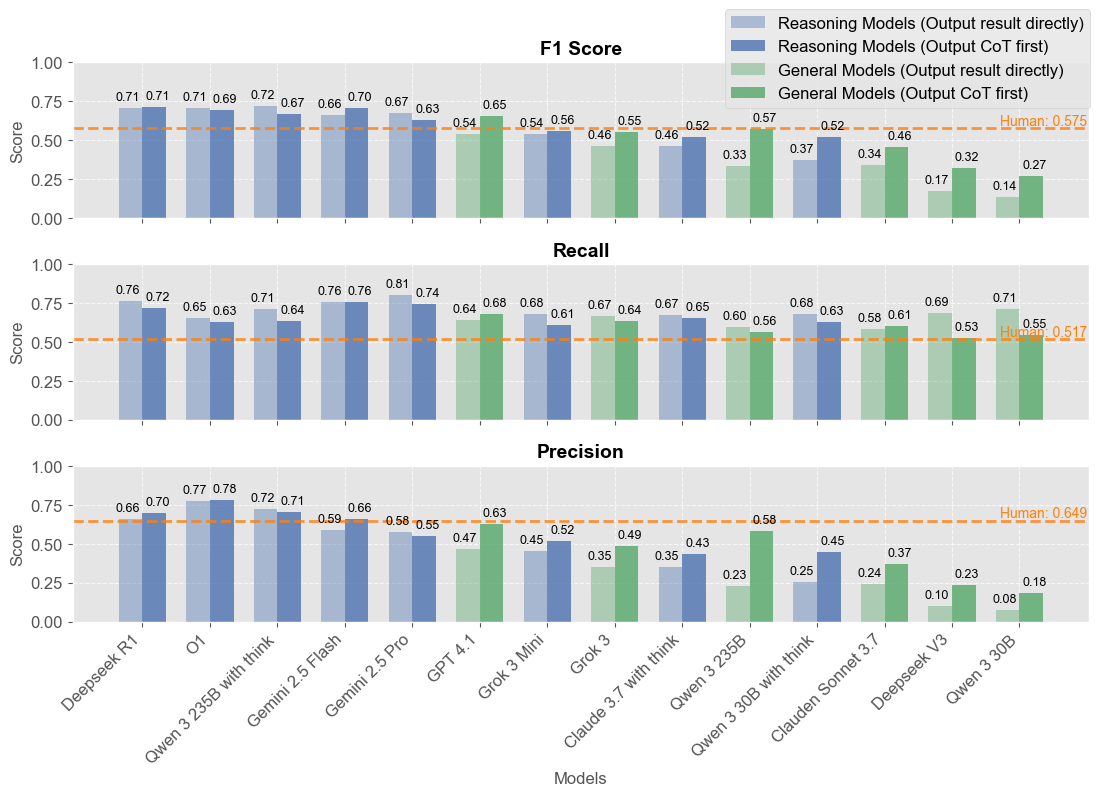

In [ ]:
import pandas as pd

# Read data
evaluation = pd.read_csv("evaluation_dataframes/evaluation_micro_center1.csv")
output_dir = "figures/figure1F_has_think.pdf"

# Plot
fig, axes, comparison_data = plot_model_performance_hasthink(evaluation, name_match, reasoning_models, save=True, save_path=output_dir)

### Appendix 2

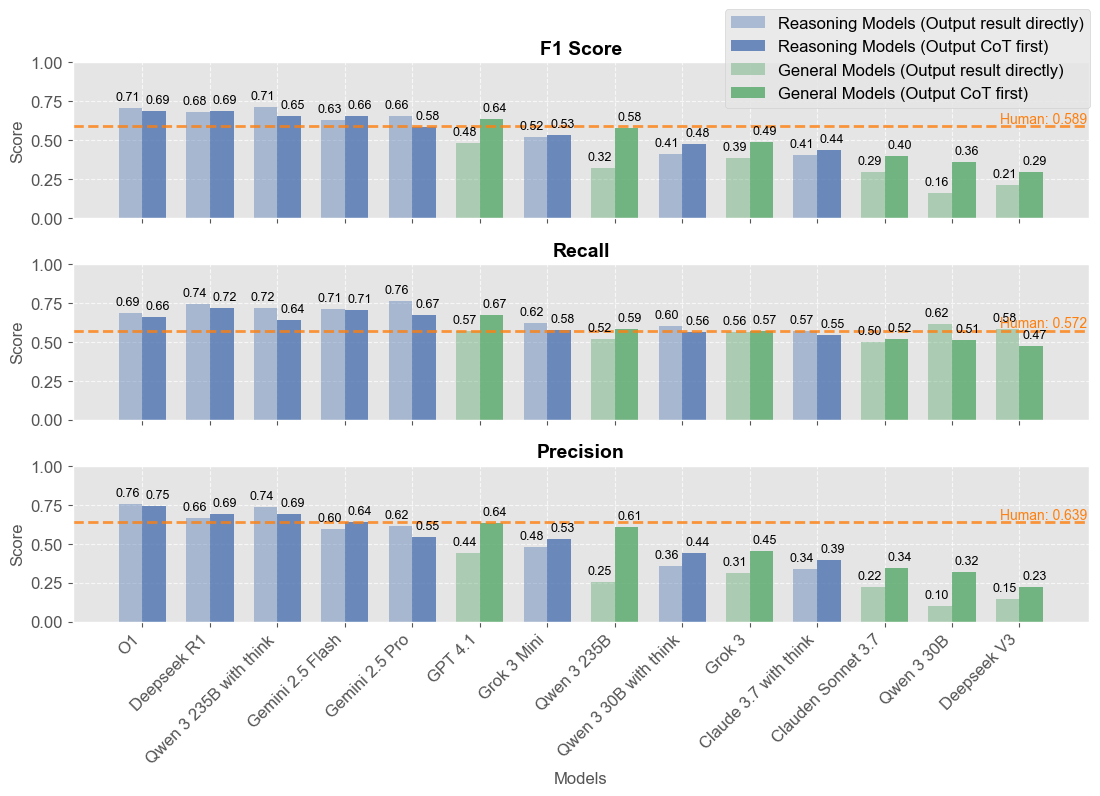

In [ ]:
# Read data
evaluation = pd.read_csv("evaluation_dataframes/evaluation_macro_center1.csv")

# Plot
fig, axes, comparison_data = plot_model_performance_hasthink(evaluation, name_match, reasoning_models, save=True, save_path="figures/Appedix_fig2_has_think_macro.pdf")

# Figure 3


### A. Human vs Deepseek Performance in Different Token-Number Queters of Prompt

In [2]:
def plot_human_vs_deepseek_by_querter(data, save=False, save_path=None):
    """
    Plots the F1 Score performance comparison between human and Deepseek R1 models
    across different token count quartiles, also displaying the token count.
    
    Parameters:
    data: DataFrame containing performance data.
    save: Whether to save the image.
    save_path: Path to save the image.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.patches import Patch
    
    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Color scheme
    model_color = '#4C72B0' 
    human_color = '#FF7F0E'
    token_color = '#2E8B57'
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(8, 6))
    
    # Get unique quarter values and sort them
    quarters = sorted(data['quarter'].unique(), key=lambda x: int(x[1:]))
    
    # Get unique models
    models = data['Models'].unique()
    
    # Set x-axis positions
    x = np.arange(len(quarters))
    width = 0.3  # Bar width
    
    # Plot F1 Score bar chart
    for j, model in enumerate(models):
        model_data = data[data['Models'] == model]
        f1_values = [model_data[model_data['quarter'] == q]['F1_score'].values[0] for q in quarters]
        
        color = human_color if model == 'human' else model_color
        alpha = 0.8
        bars = ax1.bar(x + (j - 0.5) * width, f1_values, width * 0.8, 
                     label=model if model == 'human' else 'Deepseek R1',
                     color=color, alpha=alpha, zorder=3)  # Increase zorder to ensure bars are above grid lines
        
        # Add numerical labels on top of bars, retaining 3 decimal places
        for k, bar in enumerate(bars):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=12)
    
    # Set primary axis labels and title
    # ax1.set_title('F1 Score and Median Token Count by Prompt Token Quartile', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Token Count Quartile', fontsize=13)
    ax1.set_ylabel('F1 Score', fontsize=13)
    
    # Set y-axis range
    ax1.set_ylim(0, 1.0)
    ax1.grid(True, linestyle='--', alpha=0.7, zorder=1)  # Lower zorder of grid lines
    
    # Add legend
    legend_elements = [
        Patch(facecolor=model_color, alpha=0.8, label='Deepseek R1'),
        Patch(facecolor=human_color, alpha=0.8, label='Human')
    ]
    ax1.legend(handles=legend_elements, loc='upper left', fontsize=12)
    
    # Create a second y-axis for token count
    ax2 = ax1.twinx()
    ax2.grid(False)  # Turn off grid lines for the line plot axis
    # Calculate median token count for each quarter
    token_counts = [data[data['quarter'] == q]['median_token_count'].values[0] for q in quarters]
    
    # Plot token count line graph
    ax2.plot(x, token_counts, marker='o', color=token_color, linewidth=2, markersize=8, label='Median Token Count', zorder=4)
    ax2.set_ylabel('Median Token Count', color=token_color, fontsize=12)
    ax2.tick_params(axis='y', labelcolor=token_color, labelsize=12)  # Set second y-axis tick font size to 12
    
    # Add numerical labels on the line graph
    for k, count in enumerate(token_counts):
        ax2.text(k, count + 100, f'{count:.0f}', ha='right', va='bottom', fontsize=12, color=token_color, 
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    # Set x-axis ticks
    ax1.set_xticks(x)
    ax1.set_xticklabels(quarters)
    ax1.tick_params(axis='both', labelsize=12)
    
    # Decide whether to save based on the 'save' parameter
    if save:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax1, ax2

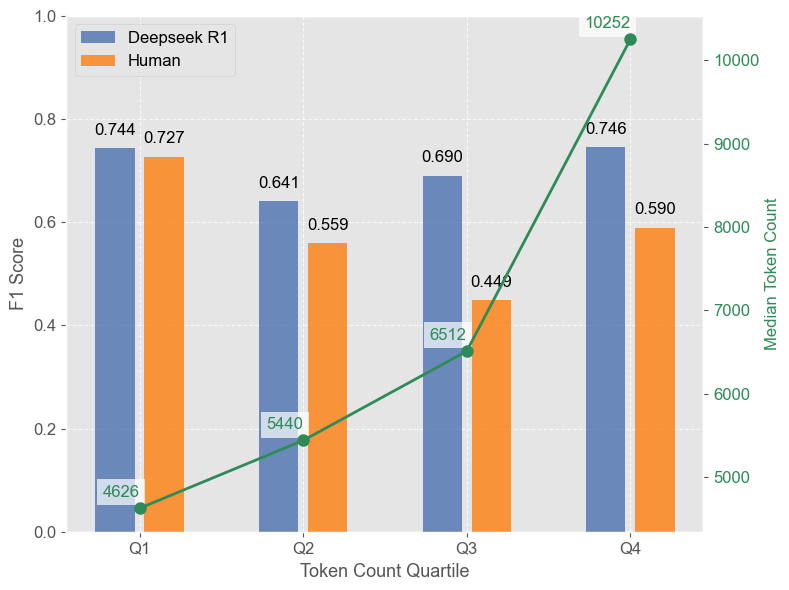

In [18]:
# Read data
import pandas as pd
data = pd.read_csv("evaluation_dataframes/sensitivity_queters.csv")

# plot
fig, ax1, ax2 = plot_human_vs_deepseek_by_querter(data, save=True, save_path="figures/figure3A_human_vs_deepseek_quarters.pdf")

### B. Deepseek R1 mistakes

In [19]:
def plot_mistakes_horizontal(data, save=False, save_path=None):
    """
    Plots a horizontal bar chart for mistake data, sorted by count from high to low, with left-aligned multi-line text labels.
    
    Parameters:
    data: DataFrame containing mistake data, should include 'Mistakes' and 'Counts' columns.
    save: Whether to save the image.
    save_path: Path to save the image.
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    import textwrap
    from matplotlib.ticker import MultipleLocator
    
    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Use the same color style as before
    bar_color = '#4C72B0'  # Blue for bar chart
    
    # Sort data (from high to low)
    sorted_data = data.sort_values('Counts', ascending=True)
    
    # Create chart
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Wrap text labels, max 30 characters per line
    wrapped_labels = [textwrap.fill(label, width=40) for label in sorted_data['Mistakes']]
    
    # Plot horizontal bar chart
    bars = ax.barh(wrapped_labels, sorted_data['Counts'], 
                  height=0.5, color=bar_color, alpha=0.8, zorder=3)
    
    # Add numerical labels on the bar chart
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
               ha='left', va='center', fontsize=14, fontweight='bold')
    
    # Set labels and title
    ax.set_xlabel('Counts', fontsize=16)
    ax.set_ylabel('')  # Remove y-axis label
    
    # Set grid lines
    ax.grid(True, linestyle='--', alpha=0.7, zorder=1, axis='x')
    ax.set_axisbelow(True)
    
    # Adjust y-axis label alignment
    ax.tick_params(axis='y', labelsize=16, pad=10)  # Increase spacing between text and axis
    # Set x-axis tick font size to 15
    ax.tick_params(axis='x', labelsize=15)
    plt.setp(ax.get_yticklabels(), ha='left')  # Set y-axis labels to left-align
    
    # Adjust x-axis range to make bars wider
    max_count = sorted_data['Counts'].max()
    ax.set_xlim(0, max_count * 1.2)
    
    # Adjust y-axis position
    ax.spines['left'].set_position(('outward', 10))
    
    # Set x-axis tick interval to integers
    ax.xaxis.set_major_locator(MultipleLocator(2))
    
    # Use figure's adjustment method to maintain left margin and ensure text is left-aligned
    plt.gcf().subplots_adjust(left=0.3)
    
    # Decide whether to save based on the 'save' parameter
    if save:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.tight_layout()  # Automatically adjust layout
    plt.show()
    
    return fig, ax


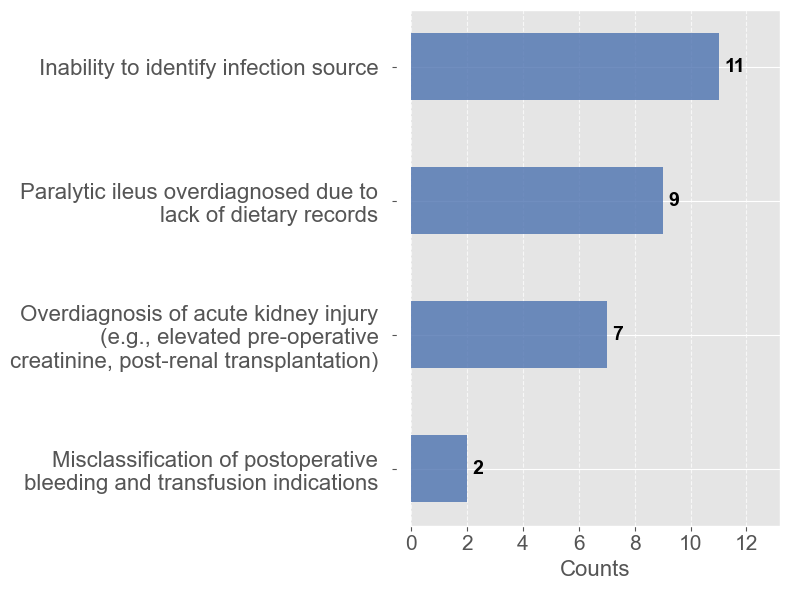

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='Counts'>)

In [20]:
import pandas as pd
# Read data
data = pd.read_csv("evaluation_dataframes/mistakes.csv", sep="|")

# Plot
plot_mistakes_horizontal(data, save=True, save_path="figures/figure3B_mistakes_analysis.pdf")

### C. Evaluation for modified prompts

In [24]:
name_match

{'claude3_7_reasoning_comprehensive_nothink': 'Claude 3.7 with think',
 'ds_v3_comprehensive_nothink': 'Deepseek V3',
 'grok3_comprehensive_nothink': 'Grok 3',
 'human': 'Human',
 'qwen3reasoning_30_comprehensive_nothink': 'Qwen 3 30B with think',
 'qwen3_235_comprehensive_nothink': 'Qwen 3 235B',
 'gpt4_1_comprehensive_nothink': 'GPT 4.1',
 'ds_r1_comprehensive_nothink': 'Deepseek R1',
 'gemini_2_5_flash_comprehensive_nothink': 'Gemini 2.5 Flash',
 'gemini_2_5_pro_comprehensive_nothink': 'Gemini 2.5 Pro',
 'qwen3_30_comprehensive_nothink': 'Qwen 3 30B',
 'o1_comprehensive_nothink': 'O1',
 'claude3_7_comprehensive_nothink': 'Clauden Sonnet 3.7',
 'qwen3reasoning_235_comprehensive_nothink': 'Qwen 3 235B with think',
 'grok3_mini_comprehensive_nothink': 'Grok 3 Mini'}

In [25]:
def plot_model_performance_promote(evaluation, name_match, reasoning_models, save=True, save_path='figures/model_comparison_with_without_promote.pdf'):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.patches import Patch

    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'

    # Color scheme
    reasoning_color = '#4C72B0'  
    other_color = '#55A868' 
    human_color = '#FF7F0E' 

    # Collect name pairs, one containing 'original', one containing 'promote'
    model_pairs = []
    modified_models = []
    original_models = []

    name_match = {key.replace('_nothink', ''): value for key, value in name_match.items()}

    for model in evaluation['Models']:
        if model in name_match.keys() and 'human' not in model.lower():
            original_models.append(model)
            # Find the corresponding model with 'promote'
            # promote_model = model.replace('_original', '_modified')
            modified_model = model + "_modified"
            
            # Check if the modified model exists in the evaluation data
            if modified_model not in evaluation['Models'].values:
                print(f"Warning: Model {modified_model} not found in evaluation data")
                continue
            if modified_model in evaluation['Models'].values:
                modified_models.append(modified_model)
                model_pairs.append((model, modified_model))
    
    # Create a new DataFrame containing comparison data
    comparison_data = []
    for original, modified in model_pairs:
        original_data = evaluation[evaluation['Models'] == original].iloc[0]
        modified_data = evaluation[evaluation['Models'] == modified].iloc[0]
        
        # Extract base model name (using name_match dictionary)
        base_name = name_match.get(original, original)
        
        comparison_data.append({
            'Model': base_name,
            'Type': 'Normal prompt',
            'Precision': original_data['Precision'],
            'Recall': original_data['Recall'],
            'F1_score': original_data['F1_score']
        })
        
        comparison_data.append({
            'Model': base_name,
            'Type': 'Promoted prompt',
            'Precision': modified_data['Precision'],
            'Recall': modified_data['Recall'],
            'F1_score': modified_data['F1_score']
        })

    # Create a new DataFrame
    comparison_df = pd.DataFrame(comparison_data)

    # Sort model names by F1 score
    model_f1_avg = comparison_df.groupby('Model')['F1_score'].mean().sort_values(ascending=False)
    model_order = model_f1_avg.index.tolist()
    comparison_df['Model'] = pd.Categorical(comparison_df['Model'], categories=model_order, ordered=True)
    comparison_df = comparison_df.sort_values(['Model', 'Type'])

    # Create three subplots
    fig, axes = plt.subplots(3, 1, figsize=(17, 12), sharex=True)
    fig.subplots_adjust(hspace=0.3)

    metrics = ['F1_score', 'Recall', 'Precision']
    titles = ['F1 Score', 'Recall', 'Precision']

    # Determine if a model is a reasoning model
    def is_reasoning_model(model_name):
        reasoning_models_base = [
            'Claude 3.7 with think',
            'Qwen 3 30B with think',
            'Deepseek R1',
            'Gemini 2.5 Flash',
            'O1',
            'Qwen 3 235B with think',
            'Grok 3 Mini',
            'Gemini 2.5 Pro'
        ]
        return any(r in model_name for r in reasoning_models_base)

    # Set x positions
    models = comparison_df['Model'].unique()
    x = np.arange(len(models))
    width = 0.35  # Bar width

    # Plot three subplots
    for i, (metric, title) in enumerate(zip(metrics, titles)):
        # Find data for 'Normal prompt' type
        original_data = comparison_df[comparison_df['Type'] == 'Normal prompt']
        promote_data = comparison_df[comparison_df['Type'] == 'Promoted prompt']
        
        # Plot original models (in front)
        original_bars = axes[i].bar(x - width/2, original_data[metric], width, 
                       color=[reasoning_color if is_reasoning_model(model) else other_color for model in original_data['Model']], 
                       alpha=0.4, label='Normal prompt')
        
        # Plot promoted models (behind)
        promote_bars = axes[i].bar(x + width/2, promote_data[metric], width, 
                      color=[reasoning_color if is_reasoning_model(model) else other_color for model in promote_data['Model']], 
                      alpha=0.8, label='Promoted prompt')
        
        # Add numerical labels on the bars, retaining 3 decimal places, and adjust label position to avoid overlap
        for bar in original_bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2. - 0.05, height + 0.03,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=10)
        
        for bar in promote_bars:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2. + 0.05, height + 0.03,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=10)
        
        # Set chart style
        axes[i].set_title(title, fontsize=16, fontweight='bold')
        axes[i].set_ylabel('Score', fontsize=14)
        axes[i].set_ylim(0, 1.0)
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
        # Add horizontal line for human performance (if human data exists)
        if 'human' in evaluation['Models'].values:
            human_value = evaluation[evaluation['Models'] == 'human'][metric].iloc[0]
            axes[i].axhline(y=human_value, color=human_color, linestyle='--', linewidth=2, alpha=0.8)
            axes[i].text(len(models), human_value + 0.02, f'Human: {human_value:.3f}', 
                        color=human_color, fontsize=14, ha='right')

    # Set x-axis labels on the last subplot
    axes[2].set_xticks(x)
    axes[2].set_xticklabels([model.replace('hard_', '') for model in models], rotation=45, ha='right', fontsize=14)
    axes[2].set_xlabel('Models', fontsize=14)
    # Set font size for y-axis tick labels
    for ax in axes:
        ax.tick_params(axis='y', labelsize=14)

    # Add legend
    legend_elements = [
        Patch(facecolor=reasoning_color, alpha=0.4, label='Reasoning Models (Normal prompt)'),
        Patch(facecolor=reasoning_color, alpha=0.8, label='Reasoning Models (Promoted prompt)'),
        Patch(facecolor=other_color, alpha=0.4, label='General Models (Normal prompt)'),
        Patch(facecolor=other_color, alpha=0.8, label='General Models (Promoted prompt)'),
        # Patch(facecolor=human_color, label='Human')
    ]
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.995, 0.97), fontsize=14)

    # Adjust layout and display
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Decide whether to save based on the 'save' parameter
    if save:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return fig, axes, comparison_df

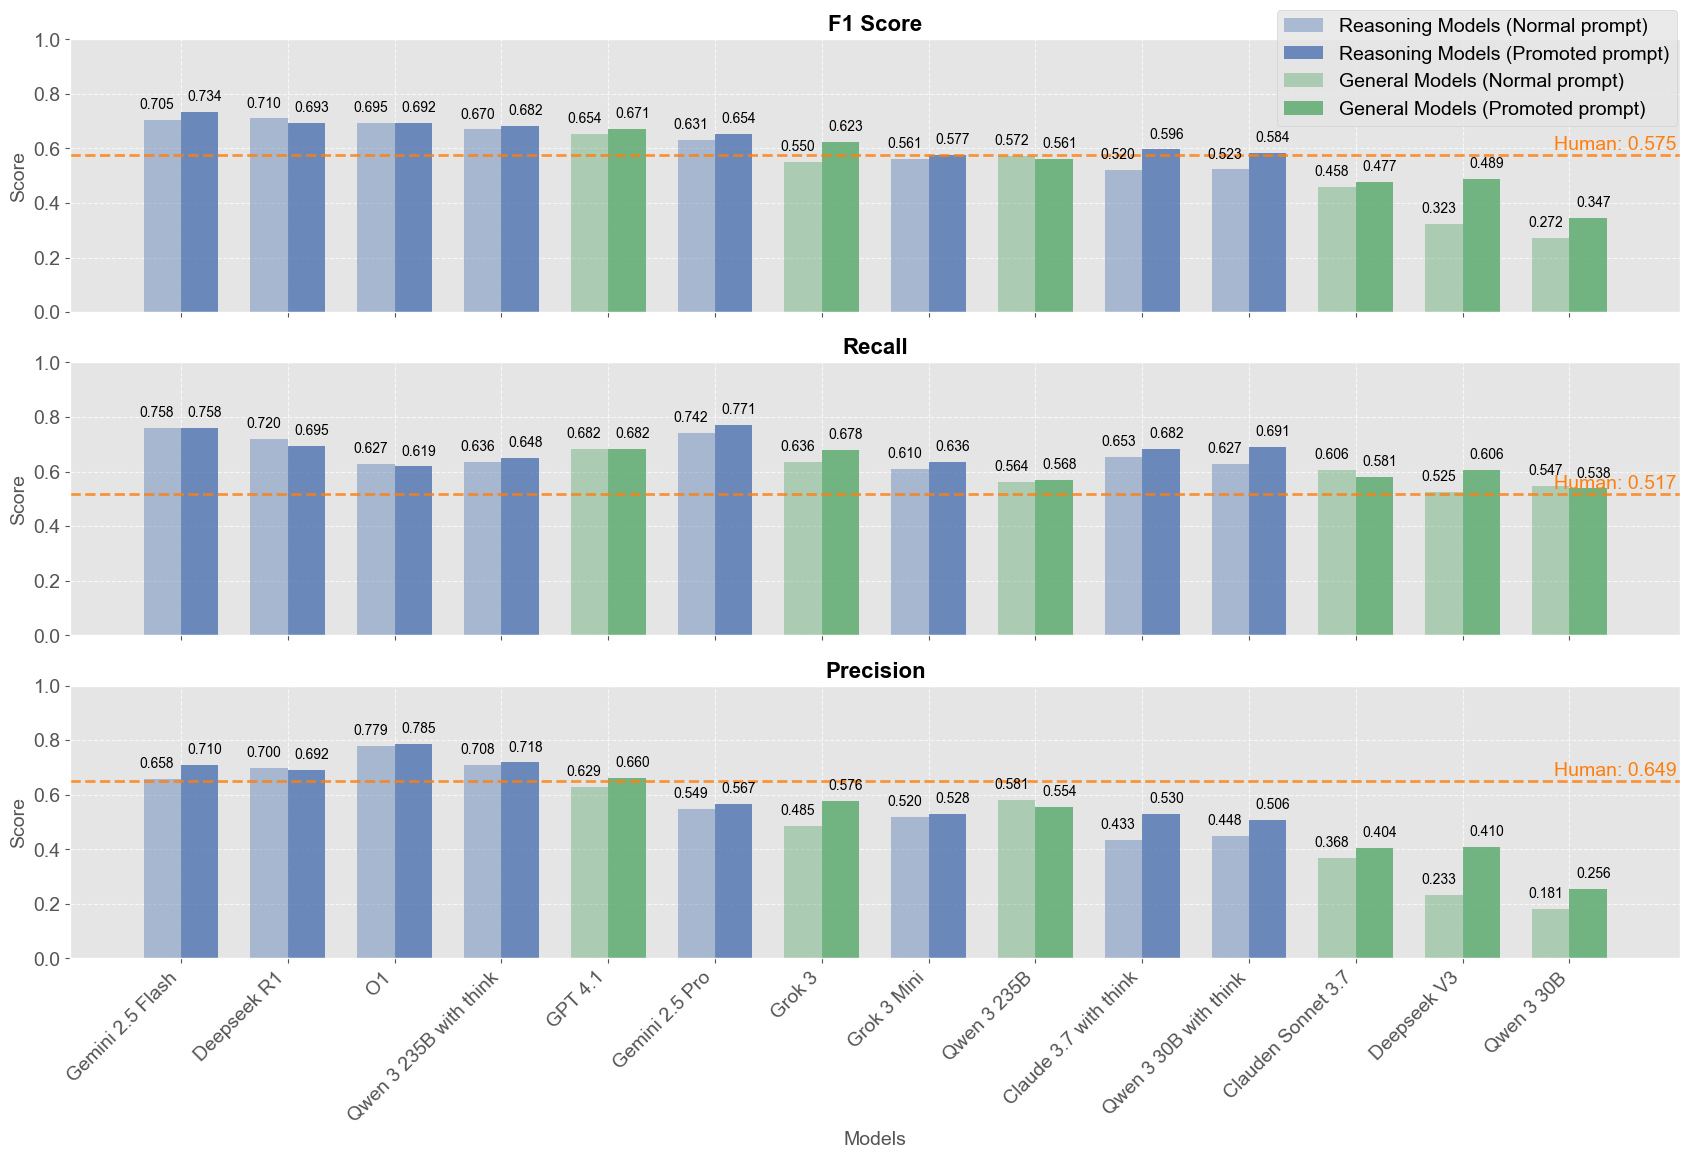

In [26]:
import pandas as pd

# Read data
evaluation = pd.read_csv("evaluation_dataframes/evaluation_micro_center1.csv")
output_dir = "figures/figure3D_modified_comparison.pdf"

# Plot
fig, axes, comparison_data = plot_model_performance_promote(evaluation, name_match, reasoning_models, save=True, save_path=output_dir)

#### Appendix 3

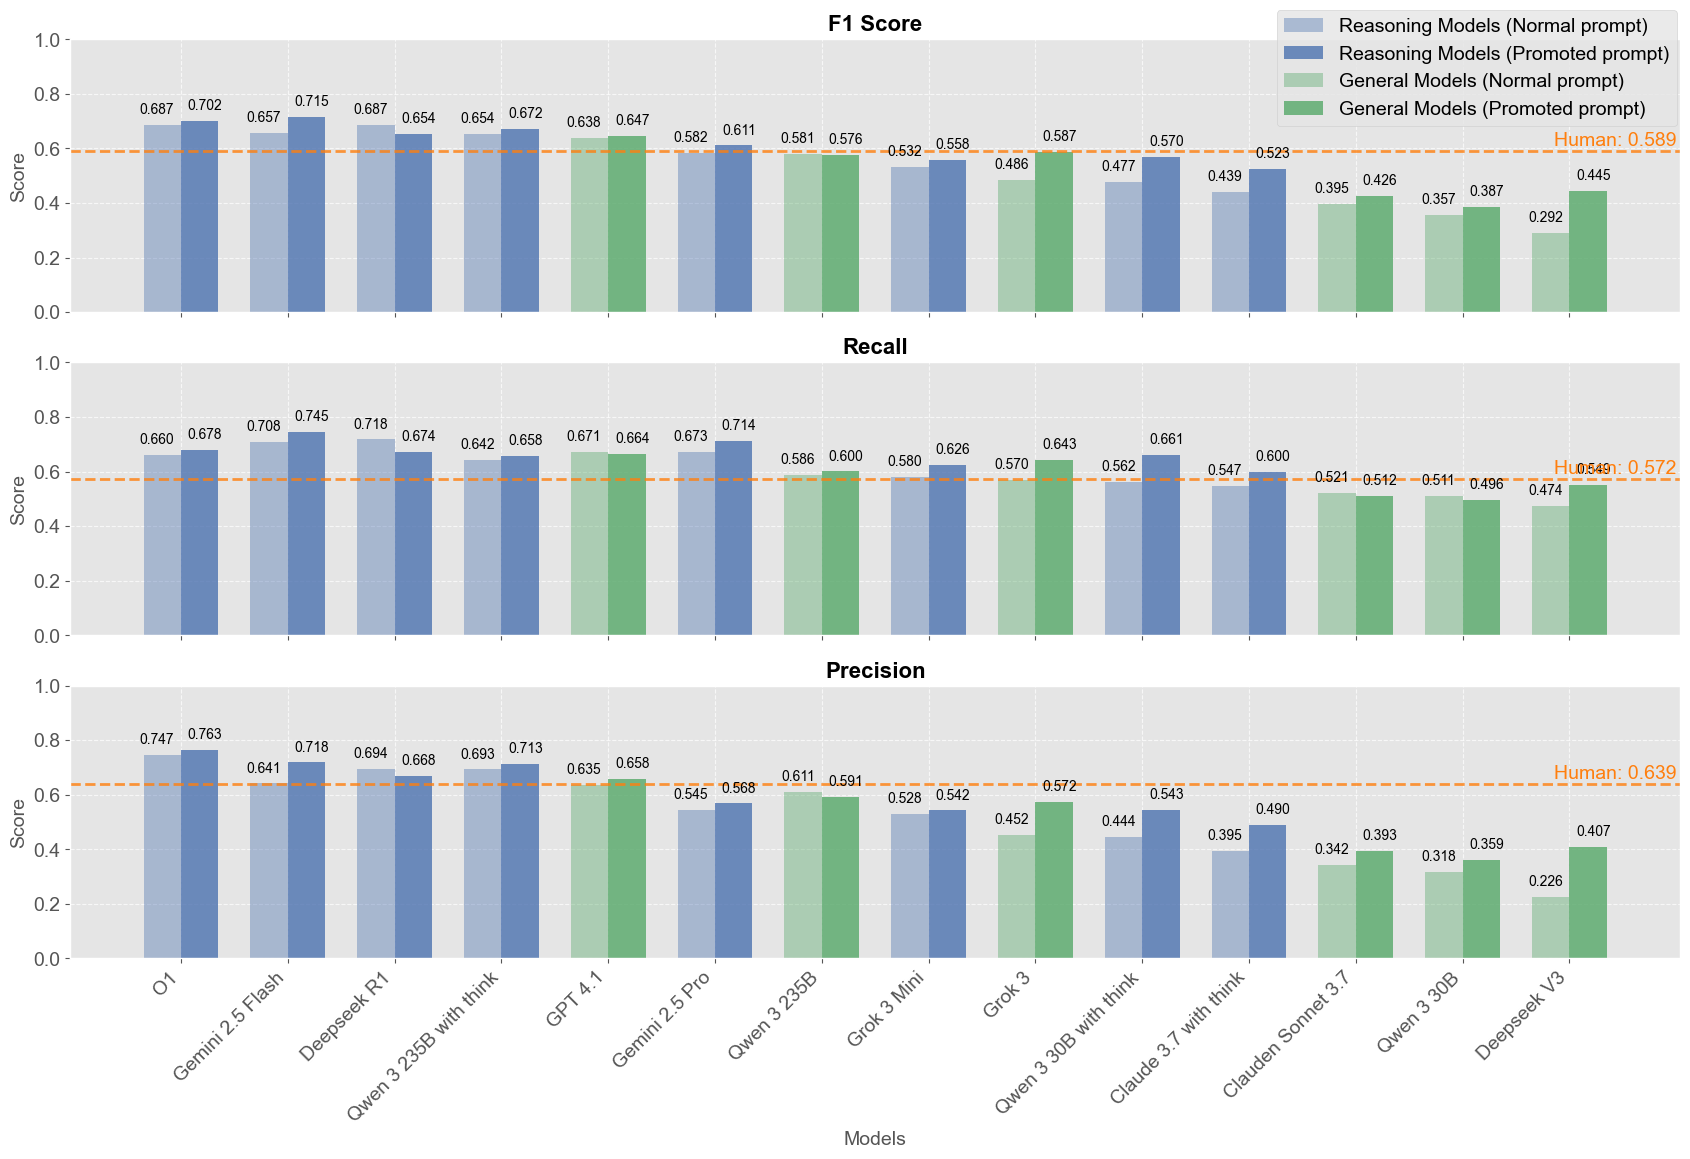

In [27]:
import pandas as pd

# Read data
evaluation = pd.read_csv("evaluation_dataframes/evaluation_macro_center1.csv")
output_dir = "figures/Appendix_fig3_modified_comparison_macro.pdf"
# Plot
fig, axes, comparison_data = plot_model_performance_promote(evaluation, name_match, reasoning_models, save=True, save_path=output_dir)

# Figure 4 open source models

## A. Quadrant Analysis


In [28]:
oc_models = {
    "ds_r1_comprehensive_modified": "Deepseek R1 671B",
    "ds_v3_comprehensive_modified": "Deepseek V3 671B",
    "qwen3_14B_comprehensive_1": "Qwen 3 14B",
    "qwen3_4B_comprehensive_1": "Qwen 3 4B",
    "qwen3_32B_comprehensive_1": "Qwen 3 32B",
    "qwen3_8B_comprehensive_1": "Qwen 3 8B",
    "qwen3_30_comprehensive_modified": "Qwen 3 30B",
    "qwen3_235_comprehensive_modified": "Qwen 3 235B",
    "qwen3reasoning_235_comprehensive_modified": "Qwen 3 235B with think",
    "qwen3reasoning_30_comprehensive_modified": "Qwen 3 30B with think",
    "gemma327B_comprehensive": "Gemma 3 27B",
    "mistral24B_comprehensive": "Mistral 3 24B",
    "qwq32B_comprehensive_modified": "QwQ 32B",
    "human": "Human",
}

oc_model_size = {
    "ds_r1_comprehensive_modified": 671,
    "ds_v3_comprehensive_modified": 671,
    "qwen3_14B_comprehensive_1": 14,
    "qwen3_4B_comprehensive_1": 4,
    "qwen3_32B_comprehensive_1": 32,
    "qwen3_8B_comprehensive_1": 8,
    "qwen3_30_comprehensive_modified": 30,
    "qwen3_235_comprehensive_modified": 235,
    "qwen3reasoning_235_comprehensive_modified": 235,
    "qwen3reasoning_30_comprehensive_modified": 30,
    "gemma327B_comprehensive": 27,
    "mistral24B_comprehensive": 24,
    "qwq32B_comprehensive_modified": 32,
}

In [29]:
evaluation_micro = pd.read_csv("evaluation_dataframes/evaluation_micro_center1.csv")
evaluation_micro_oc = evaluation_micro[evaluation_micro['Models'].isin(list(oc_models.keys()))].copy()
evaluation_micro_oc['Model_Size'] = evaluation_micro_oc['Models'].map(oc_model_size)
evaluation_micro_oc['Models'] = evaluation_micro_oc['Models'].map(oc_models)


human_f1 = evaluation_micro_oc[evaluation_micro_oc['Models'] == 'Human']['F1_score'].values[0]
print(human_f1)
evaluation_micro_oc

0.5754716981132074


Models  Precision    Recall  F1_score  Model_Size
8          Deepseek R1 671B   0.691983  0.694915  0.693446       671.0
12         Deepseek V3 671B   0.409742  0.605932  0.488889       671.0
20              Gemma 3 27B   0.162119  0.427966  0.235157        27.0
31                    Human   0.648936  0.516949  0.575472         NaN
32            Mistral 3 24B   0.242991  0.550847  0.337224        24.0
38               Qwen 3 14B   0.399267  0.461864  0.428291        14.0
54              Qwen 3 235B   0.553719  0.567797  0.560669       235.0
57               Qwen 3 30B   0.255533  0.538136  0.346521        30.0
60               Qwen 3 32B   0.317073  0.440678  0.368794        32.0
77                Qwen 3 4B   0.178654  0.326271  0.230885         4.0
93                Qwen 3 8B   0.271903  0.381356  0.317460         8.0
110  Qwen 3 235B with think   0.718310  0.648305  0.681514       235.0
113   Qwen 3 30B with think   0.506211  0.690678  0.584229        30.0
116                 QwQ 32B   0.650794  0.694915  0.672131        32.0

In [36]:
def plot_model_size_vs_f1_quadrant(data, human_f1, save=True, save_path='figures/model_size_vs_f1_quadrant.pdf'):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.patches import Patch
    
    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Color scheme
    reasoning_color = '#4C72B0'  
    other_color = '#55A868'  
    human = '#ff7f0e'
    
    # Convert to DataFrame (if not already)
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    
    # Reset index to ensure positional indexing
    data = data.reset_index(drop=True)
    
    # Determine if a model is a reasoning model
    def is_reasoning_model(model_name):
        reasoning_models_base = [
            'Qwen 3 30B with think',
            "Qwen 3 235B with think",
            'Deepseek R1',
            'QwQ 32B',
        ]
        return any(r in model_name for r in reasoning_models_base)
    
    # Determine color and alpha for each model
    colors = []
    alphas = []
    for model in data['Models']:
        if 'QwQ 32B' in model:
            alphas.append(1)  # Higher opacity
        else:
            alphas.append(0.55)  # Lower opacity for other points
        colors.append(reasoning_color if is_reasoning_model(model) else other_color)
    
    # Determine marker size based on model size
    # Normalize model sizes to a reasonable range for visualization
    min_size = data['Model_Size'].min()
    max_size = data['Model_Size'].max()
    # Scale to range [50, 500] for better visualization
    sizes = 50 + (data['Model_Size'] - min_size) / (max_size - min_size) * 450
    
    # Create figure
    plt.figure(figsize=(12,9))
    
    # Plot scatter points one by one to apply different alpha values
    for i in range(len(data)):
        plt.scatter(
            data['Model_Size'].iloc[i], 
            data['F1_score'].iloc[i], 
            c=[colors[i]], 
            s=sizes[i],
            alpha=alphas[i],
            edgecolors='none',  # Remove borders
            linewidths=0
        )
    
    # Calculate quadrant dividing lines (mean)
    mean_size = np.mean(data['Model_Size'])
    mean_f1 = np.mean(data['F1_score'])
    
    # Add quadrant dividing lines
    plt.axvline(x=mean_size, color='gray', linestyle='--', alpha=0.5)
    plt.axhline(y=mean_f1, color='gray', linestyle='--', alpha=0.5)

    plt.axhline(y=human_f1, color=human, linestyle='--', alpha=0.8, label='Human Performance')
    # Add text annotation for human performance
    plt.text(
        plt.xlim()[1],  # x position at the right edge of the plot
        human_f1 + 0.008,
        f'Human F1: {human_f1:.3f}', 
        color=human, 
        ha='right', 
        va='center', 
        fontsize=16,
        fontweight='bold'
    )
    
    # Add model name labels directly below their points
    for i, row in data.iterrows():
        short_name = row['Models'].replace('_hard_promote', '').replace('_hard', '')
        plt.annotate(
            short_name, 
            (row['Model_Size'], row['F1_score']),
            xytext=(-8, -9),  # Move label directly below the point
            textcoords='offset points',
            ha='center',      # Center horizontally
            va='top',         # Align to top of text
            fontsize=18
        )
    
    # Set logarithmic scale for X-axis (due to large model size differences)
    plt.xscale('log')
    
    # Add more x-axis ticks
    import matplotlib.ticker as ticker
    plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=2, numticks=5))  # Adjust numticks to control the number of ticks
    
    # Set tick size to 14
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    # Add labels and title
    plt.xlabel('Model Size (Billion Parameters)', fontsize=16)
    plt.ylabel('F1 Score', fontsize=16)
    # plt.title('Model Size vs. F1 Score Quadrant Analysis', fontsize=16, fontweight='bold')
    
    # Set Y-axis range
    plt.ylim([0.15, max(data['F1_score']) * 1.1])
    
    # Set X-axis range to be slightly larger
    plt.xlim([min(data['Model_Size']) * 0.75, max(data['Model_Size']) * 1.4])
    
    # Add legend
    legend_elements = [
        Patch(facecolor=reasoning_color, label='Reasoning Models'),
        Patch(facecolor=other_color, label='General Models')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=14)
    
    # Beautify the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save based on save parameter
    if save:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return plt.gcf()


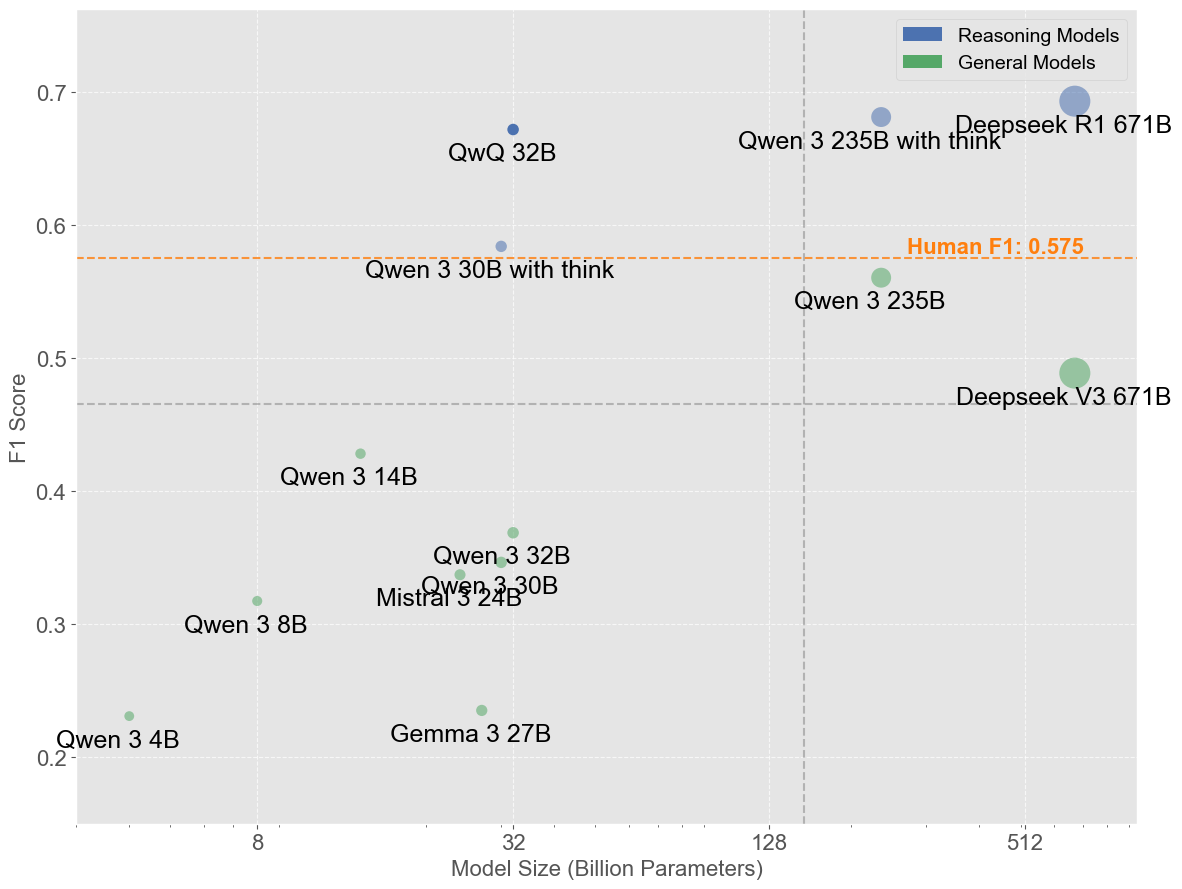

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot
plot_model_size_vs_f1_quadrant(evaluation_micro_oc, human_f1=human_f1 save=True, save_path='figures/figure4Amodel_size_vs_f1_quadrant.pdf')

### Appendix 4

In [38]:
evaluation_macro = pd.read_csv("evaluation_dataframes/evaluation_macro_center1.csv")
evaluation_macro_oc = evaluation_macro[evaluation_macro['Models'].isin(list(oc_models.keys()))].copy()
evaluation_macro_oc['Model_Size'] = evaluation_macro_oc['Models'].map(oc_model_size)
evaluation_macro_oc['Models'] = evaluation_macro_oc['Models'].map(oc_models)
human_f1 = evaluation_macro_oc[evaluation_macro_oc['Models'] == 'Human']['F1_score'].values[0]
print(human_f1)
evaluation_macro_oc


0.5893020221787345


Models  Precision    Recall  F1_score  Model_Size
8          Deepseek R1 671B   0.667808  0.673614  0.653901       671.0
12         Deepseek V3 671B   0.407322  0.549462  0.445403       671.0
20              Gemma 3 27B   0.156336  0.370907  0.207110        27.0
31                    Human   0.639041  0.571722  0.589302         NaN
32            Mistral 3 24B   0.273114  0.547668  0.342334        24.0
38               Qwen 3 14B   0.371961  0.432453  0.381095        14.0
54              Qwen 3 235B   0.591341  0.600440  0.575611       235.0
57               Qwen 3 30B   0.359429  0.496445  0.386637        30.0
60               Qwen 3 32B   0.354338  0.396086  0.350056        32.0
77                Qwen 3 4B   0.134749  0.235926  0.158778         4.0
93                Qwen 3 8B   0.308733  0.374967  0.314094         8.0
110  Qwen 3 235B with think   0.712900  0.657567  0.671629       235.0
113   Qwen 3 30B with think   0.542515  0.660828  0.570208        30.0
116                 QwQ 32B   0.656279  0.697016  0.660144        32.0

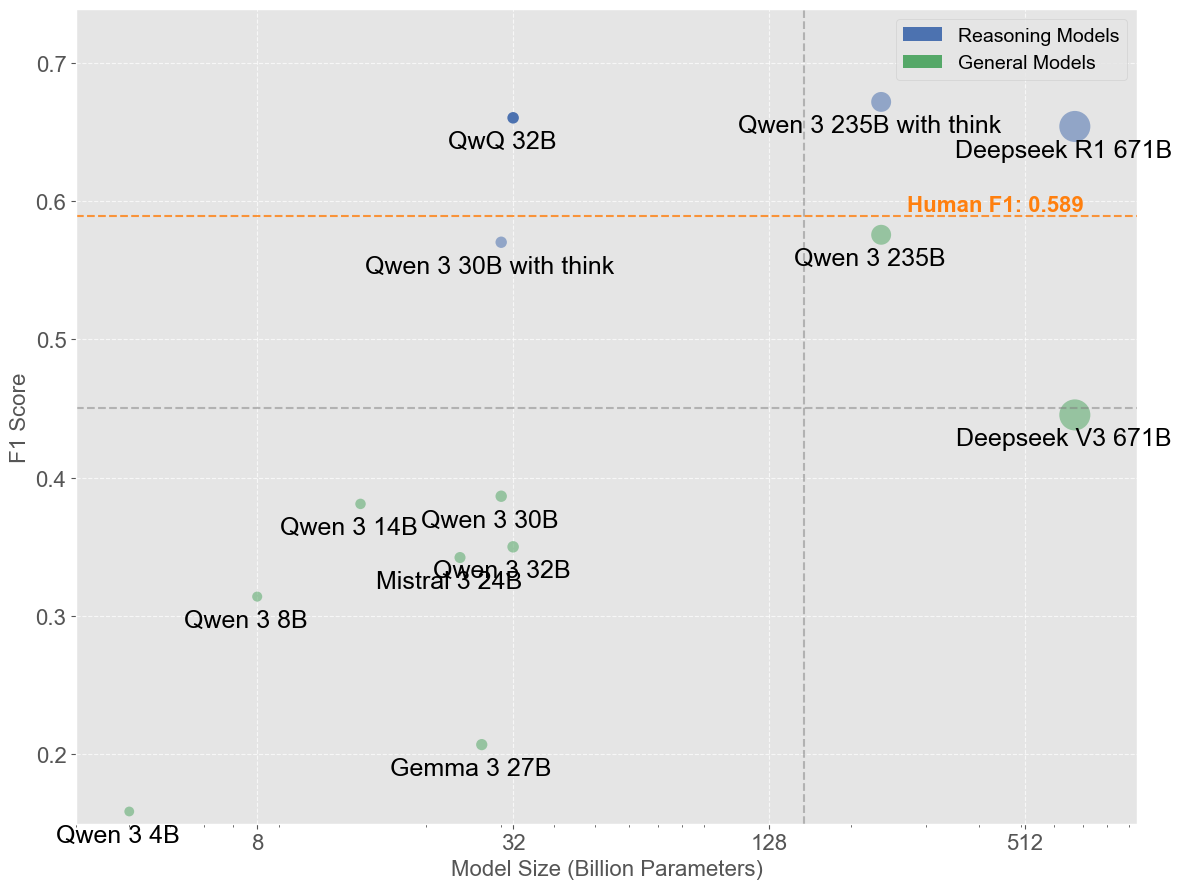

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [39]:
plot_model_size_vs_f1_quadrant(evaluation_macro_oc, human_f1=human_f1, save=True, save_path='figures/Appendix_fig4_model_size_vs_f1_quadrant_macro.pdf')

## B. Learning curve of QwQ model

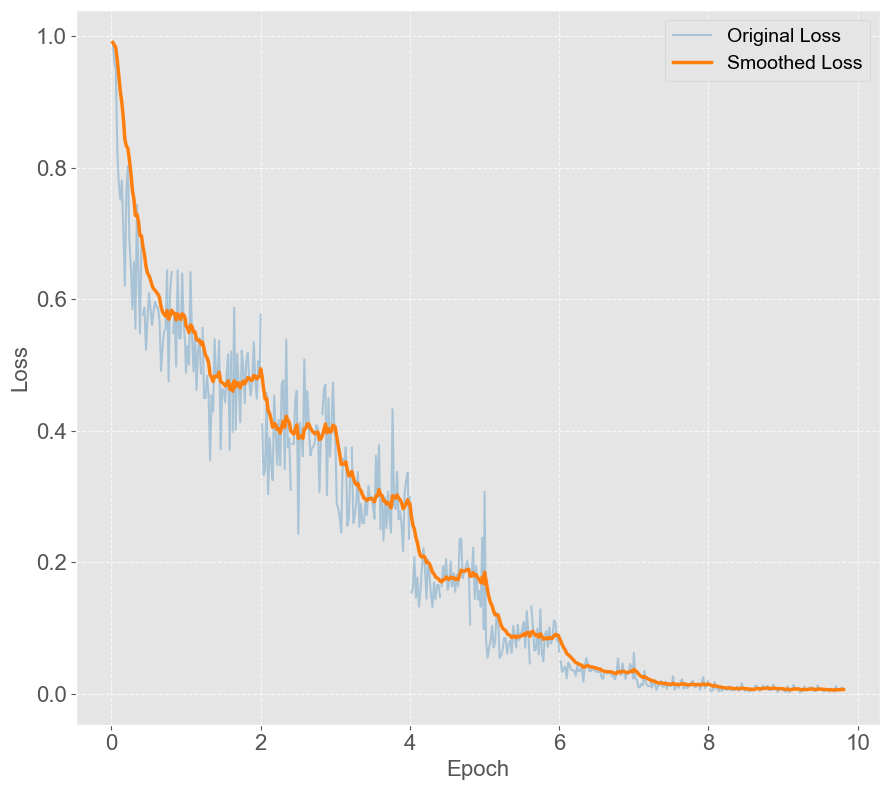

In [40]:
# Read QwQ model training log file
import json
import pandas as pd
import matplotlib.pyplot as plt

# Read jsonl file
qwq_log_path = "evaluation_dataframes/qwq_log.jsonl" # We trained QwQ on our supercomputer center and saved the log.
training_logs = []

with open(qwq_log_path, 'r') as f:
    for line in f:
        training_logs.append(json.loads(line))

# Convert to DataFrame
df_logs = pd.DataFrame(training_logs)

# Use pandas rolling method for smoothing
# Use Exponential Weighted Moving Average (EWMA) for a smoother curve
# Use Exponential Weighted Moving Average (EWMA) for a smoother curve
window = 15  # Keep current window size
df_logs['smoothed_loss'] = df_logs['loss'].ewm(span=window, adjust=False).mean()
# Handle NaN values at the beginning and end
df_logs['smoothed_loss'] = df_logs['smoothed_loss'].fillna(df_logs['loss'])

# Apply the same plotting style
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Arial'

# Plot learning curve
plt.figure(figsize=(9, 8))
ax = plt.subplot(1, 1, 1)

# Plot original training loss (semi-transparent)
plt.plot(df_logs['epoch'], df_logs['loss'], alpha=0.3, color='#1f77b4', label='Original Loss')
# Plot smoothed training loss
plt.plot(df_logs['epoch'], df_logs['smoothed_loss'], linewidth=2.5, color='#ff7f0e', label='Smoothed Loss')

# plt.title('QwQ Model Learning Curve', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.savefig('figures/figrue4B_qwq_learning_curve.pdf', dpi=300, bbox_inches='tight')
plt.show()

## C. QwQ evaluation boxplot

In [52]:
import pandas as pd 

data_center1 = pd.read_csv("evaluation_dataframes/evaluation_micro_val_center1.csv")
data_center2 = pd.read_csv("evaluation_dataframes/evaluation_micro_center2.csv")

# Add a 'source' column to each dataframe before concatenation
data_center1['source'] = 'Center 1'
data_center2['source'] = 'Center 2'
# # Remove 'jm_' prefix from model names in data_jm
# data_center2['Models'] = data_center2['Models'].str.replace('jm_', '')

data = pd.concat([data_center1, data_center2])
name_model ={
    "qwq32B_comprehensive_modified_1": "Original",
    "qwq32B_comprehensive_modified_2": "Original",
    "qwq32B_comprehensive_modified_3": "Original",
    "qwq32B_comprehensive_modified_4": "Original",
    "qwq32B_comprehensive_modified_5": "Original",
    "qwq32B_comprehensive_modified_sft_1": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_2": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_3": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_4": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_5": "LoRa Fine-tuned",
    "human": "Human",
}
# Filter the data based on the keys in name_model
data = data[data['Models'].isin(name_model.keys())]
data['Group'] = data['Models'].map(name_model)

In [53]:
data

Models  Precision    Recall  F1_score  \
31                                 human   0.593220  0.472973  0.526316   
117      qwq32B_comprehensive_modified_1   0.662500  0.716216  0.688312   
118      qwq32B_comprehensive_modified_2   0.682927  0.756757  0.717949   
119      qwq32B_comprehensive_modified_3   0.671053  0.689189  0.680000   
120      qwq32B_comprehensive_modified_4   0.649351  0.675676  0.662252   
121      qwq32B_comprehensive_modified_5   0.700000  0.756757  0.727273   
122  qwq32B_comprehensive_modified_sft_1   0.741379  0.581081  0.651515   
123  qwq32B_comprehensive_modified_sft_2   0.738462  0.648649  0.690647   
124  qwq32B_comprehensive_modified_sft_3   0.769231  0.675676  0.719424   
125  qwq32B_comprehensive_modified_sft_4   0.710145  0.662162  0.685315   
126  qwq32B_comprehensive_modified_sft_5   0.687500  0.594595  0.637681   
0                                  human   0.783333  0.635135  0.701493   
67       qwq32B_comprehensive_modified_1   0.837838  0.837838  0.837838   
68       qwq32B_comprehensive_modified_2   0.776316  0.797297  0.786667   
69       qwq32B_comprehensive_modified_3   0.826667  0.837838  0.832215   
70       qwq32B_comprehensive_modified_4   0.740741  0.810811  0.774194   
71       qwq32B_comprehensive_modified_5   0.780822  0.770270  0.775510   
72   qwq32B_comprehensive_modified_sft_1   0.828125  0.716216  0.768116   
73   qwq32B_comprehensive_modified_sft_2   0.823529  0.756757  0.788732   
74   qwq32B_comprehensive_modified_sft_3   0.838710  0.702703  0.764706   
75   qwq32B_comprehensive_modified_sft_4   0.822581  0.689189  0.750000   
76   qwq32B_comprehensive_modified_sft_5   0.812500  0.702703  0.753623   

       source            Group  
31   Center 1            Human  
117  Center 1         Original  
118  Center 1         Original  
119  Center 1         Original  
120  Center 1         Original  
121  Center 1         Original  
122  Center 1  LoRa Fine-tuned  
123  Center 1  LoRa Fine-tuned  
124  Center 1  LoRa Fine-tuned  
125  Center 1  LoRa Fine-tuned  
126  Center 1  LoRa Fine-tuned  
0    Center 2            Human  
67   Center 2         Original  
68   Center 2         Original  
69   Center 2         Original  
70   Center 2         Original  
71   Center 2         Original  
72   Center 2  LoRa Fine-tuned  
73   Center 2  LoRa Fine-tuned  
74   Center 2  LoRa Fine-tuned  
75   Center 2  LoRa Fine-tuned  
76   Center 2  LoRa Fine-tuned

In [54]:
def plot_metrics_boxplot(data, save_path=None):
    """
    Plots boxplots comparing evaluation metrics, with each source drawn as a separate subplot (panel), arranged vertically.
    
    Parameters:
    data: Data containing model results, such as the table provided in the problem.
    save_path: Path to save the image; defaults to not saving.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Patch
    from scipy.stats import mannwhitneyu  # Import Mann-Whitney U test
    from matplotlib.lines import Line2D
    
    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Create figure and two vertically arranged subplots
    fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    
    # Define colors
    original_color = '#4C72B0'
    lora_color = '#C44E52'
    human_color = 'orange'
    
    # Get unique source values
    sources = data['source'].unique()
    
    # Create position mapping for each subplot
    positions = {
        'F1': {'Original': 0.82, 'LoRa Fine-tuned': 1.18},
        'Recall': {'Original': 1.82, 'LoRa Fine-tuned': 2.18},
        'Precision': {'Original': 2.82, 'LoRa Fine-tuned': 3.18}
    }
    
    # Set different y-axis ranges and p-value positions for different sources
    ylims = {
        'Center 1': (0.45, 0.8),
        'Center 2': (0.6, 0.9)
    }
    
    p_val_positions = {
        'Center 1': 0.76,
        'Center 2': 0.87
    }
    
    # Human metrics for all sources
    human_metrics = {
        'Center 1': {
            'F1': 0.526316,
            'Recall': 0.472973,
            'Precision': 0.593220
        },
        'Center 2': {
            'F1': 0.701493,
            'Recall': 0.635135,
            'Precision': 0.783333
        }
    }
    
    # Iterate through each source to create a subplot for each
    for i, source in enumerate(sources):
        # Extract data for the current source
        source_data = data[data['source'] == source]
        original_data = source_data[source_data['Group'] == 'Original']
        lora_data = source_data[source_data['Group'] == 'LoRa Fine-tuned']
        
        # Create DataFrame
        metrics = ['F1_score', 'Recall', 'Precision']
        df_data = []
        
        for metric in metrics:
            # Add Original group data
            for val in original_data[metric].values:
                df_data.append({
                    'Metric': metric.replace('_score', ''),
                    'Group': 'Original',
                    'Value': val
                })
            
            # Add LoRa Fine-tuned group data
            for val in lora_data[metric].values:
                df_data.append({
                    'Metric': metric.replace('_score', ''),
                    'Group': 'LoRa Fine-tuned',
                    'Value': val
                })
        
        df = pd.DataFrame(df_data)
        
        # Plot on the current subplot
        ax = axes[i]
        
        # Manually draw boxplots
        for metric in ['F1', 'Recall', 'Precision']:
            for group, color in zip(['Original', 'LoRa Fine-tuned'], [original_color, lora_color]):
                pos = positions[metric][group]
                data_points = df[(df['Metric'] == metric) & (df['Group'] == group)]['Value']
                
                if len(data_points) > 0:  # Ensure there is data to plot
                    # Draw boxplot
                    bp = ax.boxplot([data_points], positions=[pos], patch_artist=False, widths=0.3, 
                                  showcaps=True, showfliers=False, boxprops={'color': color, 'linewidth': 2},
                                  whiskerprops={'color': color, 'linewidth': 2},
                                  medianprops={'color': color, 'linewidth': 2},
                                  capprops={'color': color, 'linewidth': 2})
                    
                    # Add scatter points
                    scatter_x = pos + np.random.normal(0, 0.05, size=len(data_points))
                    ax.scatter(scatter_x, data_points, color=color, alpha=0.8, s=80, edgecolor='white')
            
            # Calculate p-value for non-parametric test
            original_values = df[(df['Metric'] == metric) & (df['Group'] == 'Original')]['Value']
            lora_values = df[(df['Metric'] == metric) & (df['Group'] == 'LoRa Fine-tuned')]['Value']
            
            if len(original_values) > 0 and len(lora_values) > 0:
                # Perform Mann-Whitney U test
                stat, p_value = mannwhitneyu(original_values, lora_values)
                
                # Determine p-value annotation type
                if p_value < 0.001:
                    p_text = r'$\it{p}$ < 0.001 ***'
                elif p_value < 0.01:
                    p_text = fr'$\it{{p}}$ = {p_value:.3f} **'
                elif p_value < 0.05:
                    p_text = fr'$\it{{p}}$ = {p_value:.3f} *'
                else:
                    p_text = fr'$\it{{p}}$ = {p_value:.3f} ns'
                
                # Add p-value to the plot, using custom positions for each source
                x_pos = (positions[metric]['Original'] + positions[metric]['LoRa Fine-tuned']) / 2
                y_pos = p_val_positions[source]
                ax.text(x_pos, y_pos, p_text, horizontalalignment='center',
                        verticalalignment='bottom', fontsize=14, fontweight='bold')
            
            # Add Human metric horizontal line
            if source in human_metrics and metric in human_metrics[source]:
                x_min = positions[metric]['Original'] - 0.2
                x_max = positions[metric]['LoRa Fine-tuned'] + 0.2
                ax.hlines(y=human_metrics[source][metric], xmin=x_min, xmax=x_max, 
                         color=human_color, linestyle='--', linewidth=2)
                
                # Add text label
                ax.text(x_max - 0.13, human_metrics[source][metric] + 0.005, 
                       f'{human_metrics[source][metric]:.3f}', 
                       color="black", fontsize=12, fontweight='bold', 
                       verticalalignment='center')
        
        # Set current subplot style
        ax.set_xticks([1, 2, 3])
        ax.set_xticklabels(['F1', 'Recall', 'Precision'])
        ax.set_title(f'Center {1 if source == "zs" else 2}', fontsize=18, fontweight='bold')
        
        # Use y-axis range defined for each source
        ax.set_ylim(ylims[source])
        
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Set x-axis label only for the last subplot
        if i == len(sources) - 1:
            ax.set_xlabel('Metric', fontsize=16, fontweight='bold')
        
        # Set y-axis label for each subplot
        ax.set_ylabel('Score', fontsize=16, fontweight='bold')
    
    # Add common legend at the top
    legend_elements = [
        Patch(facecolor=original_color, edgecolor='black', linewidth=1.5, label='Original'),
        Patch(facecolor=lora_color, edgecolor='black', linewidth=1.5, label='LoRa Fine-tuned'),
        Line2D([0], [0], color=human_color, linestyle='--', linewidth=2, label='Human')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.02),
               fancybox=True, shadow=False, ncol=3, fontsize=14)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make space for the top legend
    
    # Save the plot (if path is provided)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    return fig, axes

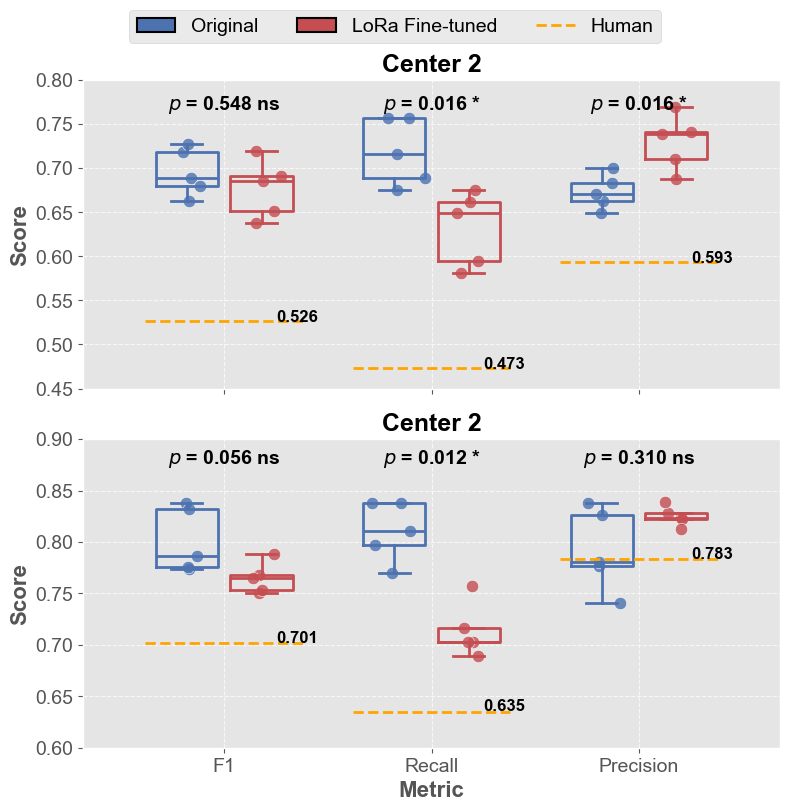

(<Figure size 800x800 with 2 Axes>,
 array([<Axes: title={'center': 'Center 2'}, ylabel='Score'>,
        <Axes: title={'center': 'Center 2'}, xlabel='Metric', ylabel='Score'>],
       dtype=object))

In [55]:

plot_metrics_boxplot(data, save_path='figures/figure4C_QwQ_evaluation_boxplot.pdf')

### Appendix 5

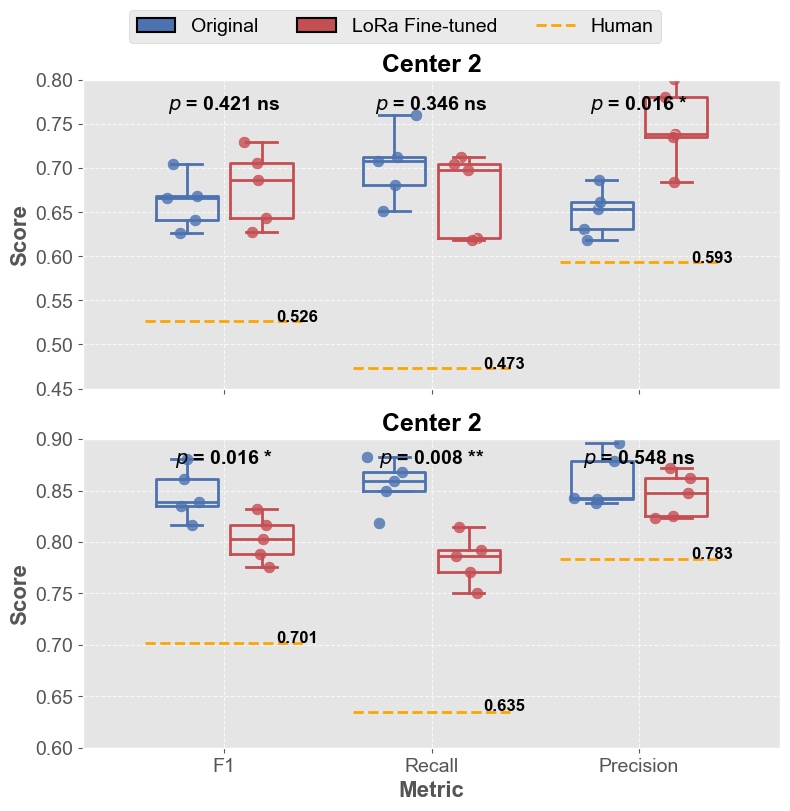

(<Figure size 800x800 with 2 Axes>,
 array([<Axes: title={'center': 'Center 2'}, ylabel='Score'>,
        <Axes: title={'center': 'Center 2'}, xlabel='Metric', ylabel='Score'>],
       dtype=object))

In [58]:
import pandas as pd 
import pandas as pd 

data_center1 = pd.read_csv("evaluation_dataframes/evaluation_macro_val_center1.csv")
data_center2 = pd.read_csv("evaluation_dataframes/evaluation_macro_center2.csv")

# Add a 'source' column to each dataframe before concatenation
data_center1['source'] = 'Center 1'
data_center2['source'] = 'Center 2'

data = pd.concat([data_center1, data_center2])
name_model ={
    "qwq32B_comprehensive_modified_1": "Original",
    "qwq32B_comprehensive_modified_2": "Original",
    "qwq32B_comprehensive_modified_3": "Original",
    "qwq32B_comprehensive_modified_4": "Original",
    "qwq32B_comprehensive_modified_5": "Original",
    "qwq32B_comprehensive_modified_sft_1": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_2": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_3": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_4": "LoRa Fine-tuned",
    "qwq32B_comprehensive_modified_sft_5": "LoRa Fine-tuned",
    "human": "Human",
}
# Filter the data based on the keys in name_model
data = data[data['Models'].isin(name_model.keys())]
data['Group'] = data['Models'].map(name_model)

plot_metrics_boxplot(data, save_path='figures/Appendix_fig5_QwQ_evaluation_boxplot_macro.pdf')

# Figure 5

### A: 示意图
Completed outside

## B. 简化任务后模型的改变

In [59]:
filter_models = [
    "ds_r1_targeted",
    "ds_r1_comprehensive_modified",
    "human",
    "gemma327B_comprehensive",
    "gemma327B_targeted_after",
    "mistral24B_comprehensive",
    "mistral24B_targeted_after",
    "qwq32B_comprehensive_modified",
    "qwq32B_targeted",
    "qwen3_32B_comprehensive_1",
    "qwen3_32B_targeted_1",
    "qwen3_14B_comprehensive_1",
    "qwen3_14B_targeted_1",
    "qwen3_8B_comprehensive_1",
    "qwen3_8B_targeted_1",
    "qwen3_4B_comprehensive_1",
    "qwen3_4B_targeted_1",
]

In [64]:
def identify_strategy(model_name):
    if "targeted" in model_name:
        strategy = "Targeted strategy"
    elif "comprehensive" in model_name:
        strategy = "Comprehensive strategy"
    elif "human" in model_name:
        strategy = None
    return strategy

def identify_model_name(model_name):
    model = ""
    if "r1" in model_name:
        model = "Deepseek R1"
    elif "v3" in model_name:
        model = "Deepseek V3"
    elif "qwq" in model_name:
        model = "QwQ 32B"
    elif "gemma" in model_name:
        model = "Gemma 3 27B"
    elif "mistral" in model_name:
        model = "Mistral 3 Small 24B"
    elif "qwen3_4B" in model_name:
        model = "Qwen 3 4B"
    elif "qwen3_8B" in model_name:
        model = "Qwen 3 8B"
    elif "qwen3_14B" in model_name:
        model = "Qwen 3 14B"
    elif "qwen3_32B" in model_name:
        model = "Qwen 3 32B"
    elif "human" in model_name:
        model = "Human"
    return model

In [65]:
def process_data(data):
    data = data[data["Models"].isin(filter_models)]
    data["stragetry"] = data["Models"].apply(identify_strategy)
    data["Model_formal"] = data["Models"].apply(identify_model_name)
    return data

In [66]:
import pandas as pd

data = pd.read_csv("evaluation_dataframes/evaluation_micro_center1.csv")
data = process_data(data)

/var/folders/4z/2fqh7q810h785x09bzsk94rm0000gn/T/ipykernel_82549/408419924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["stragetry"] = data["Models"].apply(identify_strategy)
/var/folders/4z/2fqh7q810h785x09bzsk94rm0000gn/T/ipykernel_82549/408419924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Model_formal"] = data["Models"].apply(identify_model_name)


In [67]:
def plot_strategy_comparison(evaluation_df=None, evaluation_path=None, save=True, save_path='figures/model_comparison_strategy.pdf'):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from matplotlib.patches import Patch
    
    # If dataframe not provided, load from file
    if evaluation_df is None and evaluation_path is not None:
        evaluation = pd.read_csv(evaluation_path)
    else:
        evaluation = evaluation_df
    
    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Colors for different model types
    reasoning_color = '#4C72B0'
    other_color = '#55A868'  
    human_color = '#FF7F0E'
    
    # Alpha values for different strategies
    comp_alpha = 0.5  # Darker - Comprehensive strategy
    target_alpha = 0.8  # Lighter - Targeted strategy
    
    # Define reasoning models
    reasoning_models = ['Deepseek R1', 'QwQ 32B']
    
    # Find model pairs (comprehensive and targeted)
    model_pairs = []
    
    # Create a mapping of model names from the evaluation data
    models_dict = {}
    for _, row in evaluation.iterrows():
        model = row['Models']
        strategy = row['stragetry']
        model_formal = row['Model_formal']
        
        if strategy in ['Comprehensive strategy', 'Targeted strategy']:
            base_name = model_formal
            models_dict[model] = {'name': base_name, 'strategy': strategy}
    
    # Find models that have both strategies
    base_models = {}
    for model, info in models_dict.items():
        base_name = info['name']
        strategy = info['strategy']
        
        if base_name not in base_models:
            base_models[base_name] = {'Comprehensive strategy': None, 'Targeted strategy': None}
        
        base_models[base_name][strategy] = model
    
    # Create pairs for models that have both strategies
    for base_name, strategies in base_models.items():
        comp_model = strategies['Comprehensive strategy']
        target_model = strategies['Targeted strategy']
        
        if comp_model is not None and target_model is not None:
            model_pairs.append((comp_model, target_model, base_name))
    
    # Create dataframe for comparison
    comparison_data = []
    for comp_model, target_model, base_name in model_pairs:
        comp_row = evaluation[evaluation['Models'] == comp_model].iloc[0]
        target_row = evaluation[evaluation['Models'] == target_model].iloc[0]
        
        comparison_data.append({
            'Model': base_name,
            'Type': 'Comprehensive strategy',
            'Precision': comp_row['Precision'],
            'Recall': comp_row['Recall'],
            'F1_score': comp_row['F1_score']
        })
        
        comparison_data.append({
            'Model': base_name,
            'Type': 'Targeted strategy',
            'Precision': target_row['Precision'],
            'Recall': target_row['Recall'],
            'F1_score': target_row['F1_score']
        })
    
    # Create dataframe
    comparison_df = pd.DataFrame(comparison_data)
    
    # Sort models by average F1 score
    model_f1_avg = comparison_df.groupby('Model')['F1_score'].mean().sort_values(ascending=False)
    model_order = model_f1_avg.index.tolist()
    comparison_df['Model'] = pd.Categorical(comparison_df['Model'], categories=model_order, ordered=True)
    comparison_df = comparison_df.sort_values(['Model', 'Type'])
    
    # Create three subplots
    fig, axes = plt.subplots(3, 1, figsize=(17, 12), sharex=True)
    fig.subplots_adjust(hspace=0.3)
    
    metrics = ['F1_score', 'Recall', 'Precision']
    titles = ['F1 Score', 'Recall', 'Precision']
    
    # Set x positions
    models = comparison_df['Model'].unique()
    x = np.arange(len(models))
    width = 0.35  # Bar width
    
    # Function to check if a model is a reasoning model
    def is_reasoning_model(model_name):
        return model_name in reasoning_models
    
    # Plot three subplots
    for i, (metric, title) in enumerate(zip(metrics, titles)):
        # Get data for each strategy type
        comp_data = comparison_df[comparison_df['Type'] == 'Comprehensive strategy']
        target_data = comparison_df[comparison_df['Type'] == 'Targeted strategy']
        
        # Plot bars with different colors based on model type and strategy
        for j, model in enumerate(models):
            # Comprehensive strategy
            comp_model_data = comp_data[comp_data['Model'] == model]
            if not comp_model_data.empty:
                value = comp_model_data[metric].iloc[0]
                color = reasoning_color if is_reasoning_model(model) else other_color
                bar = axes[i].bar(j - width/2, value, width, color=color, alpha=comp_alpha)
                height = bar[0].get_height()
                axes[i].text(j - width/2, height + 0.03,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=16)
            
            # Targeted strategy
            target_model_data = target_data[target_data['Model'] == model]
            if not target_model_data.empty:
                value = target_model_data[metric].iloc[0]
                color = reasoning_color if is_reasoning_model(model) else other_color
                bar = axes[i].bar(j + width/2, value, width, color=color, alpha=target_alpha)
                height = bar[0].get_height()
                axes[i].text(j + width/2, height + 0.03,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=16)
        
        # Set chart style
        axes[i].set_title(title, fontsize=16, fontweight='bold')
        axes[i].set_ylabel('Score', fontsize=16)
        axes[i].set_ylim(0, 1.0)
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
        # Add human performance horizontal line if available
        human_row = evaluation[evaluation['Models'] == 'human']
        if not human_row.empty:
            human_value = human_row[metric].iloc[0]
            axes[i].axhline(y=human_value, color=human_color, linestyle='--', linewidth=2, alpha=0.8)
            axes[i].text(len(models) - 2, human_value + 0.02, f'Human: {human_value:.3f}', 
                       color=human_color, fontsize=16, ha='right')
    
    # Set x-axis labels on the last subplot
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(models, rotation=45, ha='right', fontsize=16)
    axes[2].set_xlabel('Models', fontsize=16)
    
    # Set y-axis tick label font size
    for ax in axes:
        ax.tick_params(axis='y', labelsize=16)
    
    # Add legend
    legend_elements = [
        Patch(facecolor=reasoning_color, alpha=comp_alpha, label='Reasoning Models (Comprehensive strategy)'),
        Patch(facecolor=reasoning_color, alpha=target_alpha, label='Reasoning Models (Targeted strategy)'),
        Patch(facecolor=other_color, alpha=comp_alpha, label='General Models (Comprehensive strategy)'),
        Patch(facecolor=other_color, alpha=target_alpha, label='General Models (Targeted strategy)')
    ]
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.985, 0.95), fontsize=14)
    
    # Adjust layout and display
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Save if requested
    if save:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return fig, axes, comparison_df

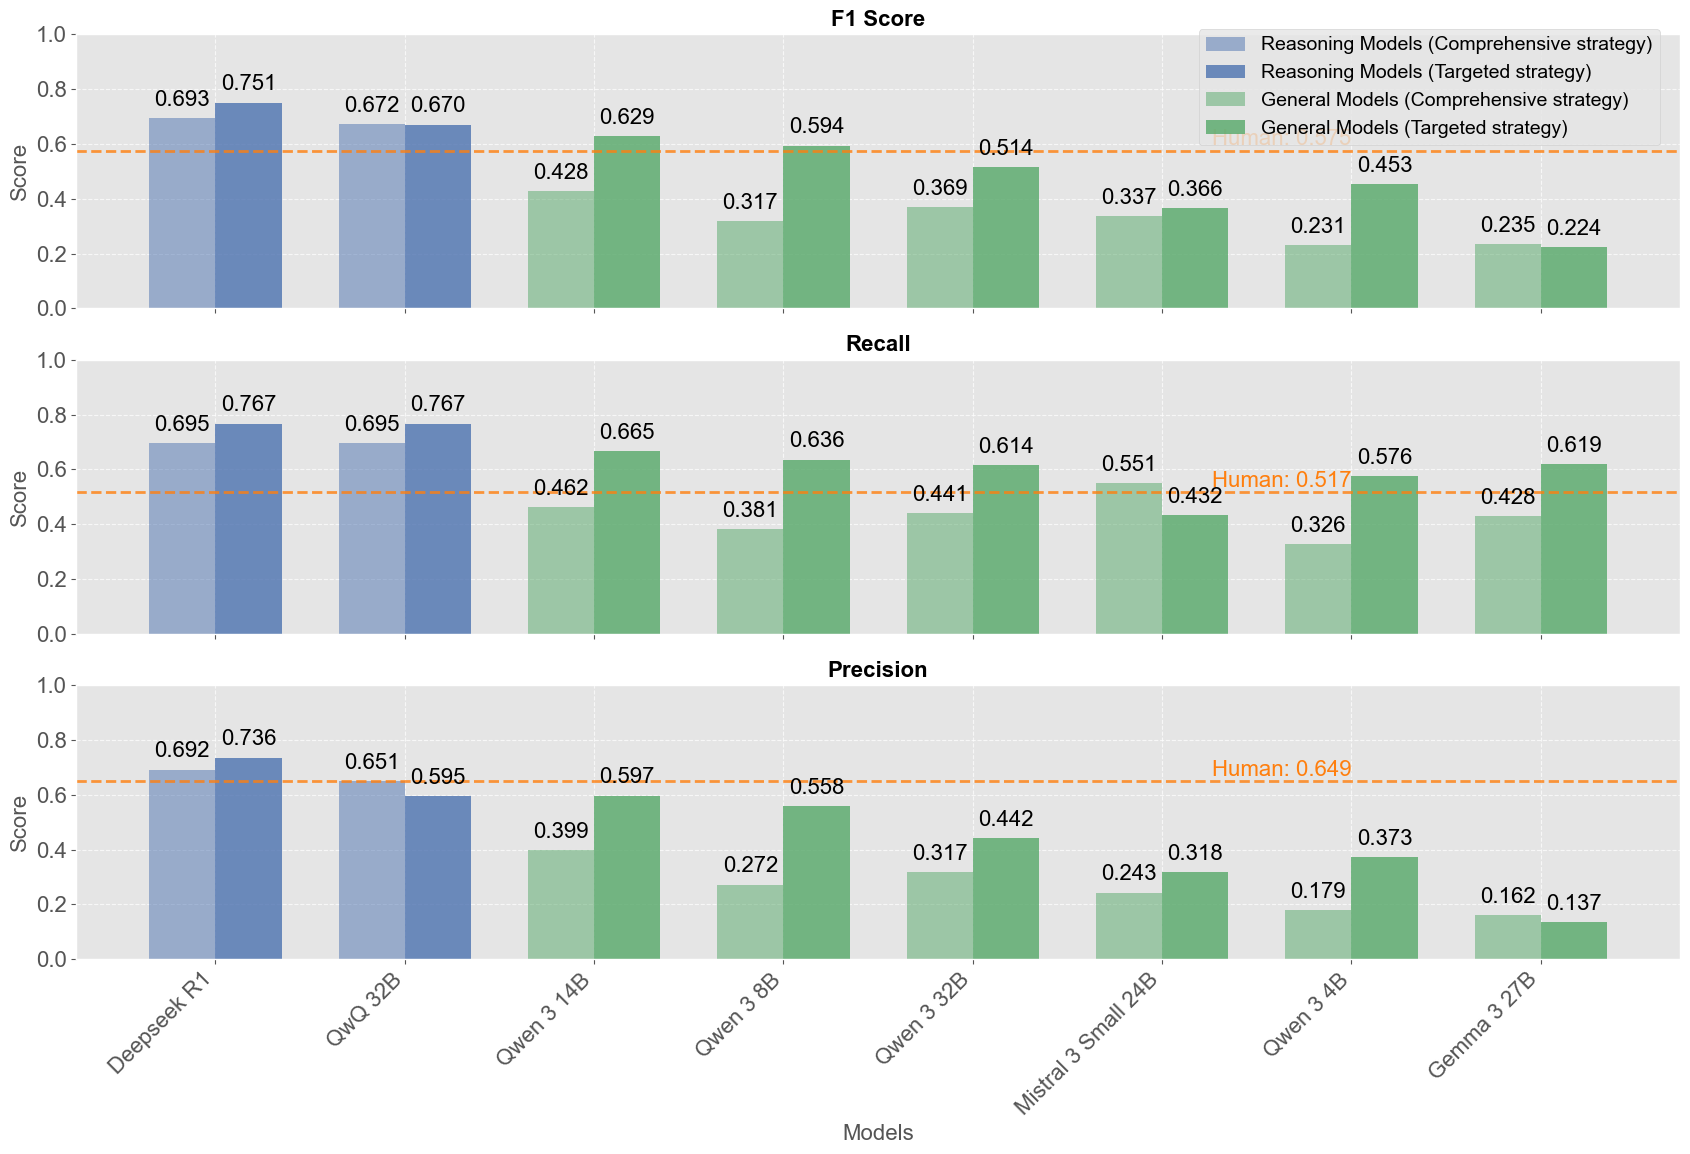

(<Figure size 1700x1200 with 3 Axes>,
 array([<Axes: title={'center': 'F1 Score'}, ylabel='Score'>,
        <Axes: title={'center': 'Recall'}, ylabel='Score'>,
        <Axes: title={'center': 'Precision'}, xlabel='Models', ylabel='Score'>],
       dtype=object),
                   Model                    Type  Precision    Recall  F1_score
 0           Deepseek R1  Comprehensive strategy   0.691983  0.694915  0.693446
 1           Deepseek R1       Targeted strategy   0.735772  0.766949  0.751037
 14              QwQ 32B  Comprehensive strategy   0.650794  0.694915  0.672131
 15              QwQ 32B       Targeted strategy   0.595395  0.766949  0.670370
 6            Qwen 3 14B  Comprehensive strategy   0.399267  0.461864  0.428291
 7            Qwen 3 14B       Targeted strategy   0.596958  0.665254  0.629259
 12            Qwen 3 8B  Comprehensive strategy   0.271903  0.381356  0.317460
 13            Qwen 3 8B       Targeted strategy   0.557621  0.635593  0.594059
 8            Qwe

In [68]:
plot_strategy_comparison(data, save=True, save_path="figures/figure5B_compare_strategy.pdf")

### Appendix 5


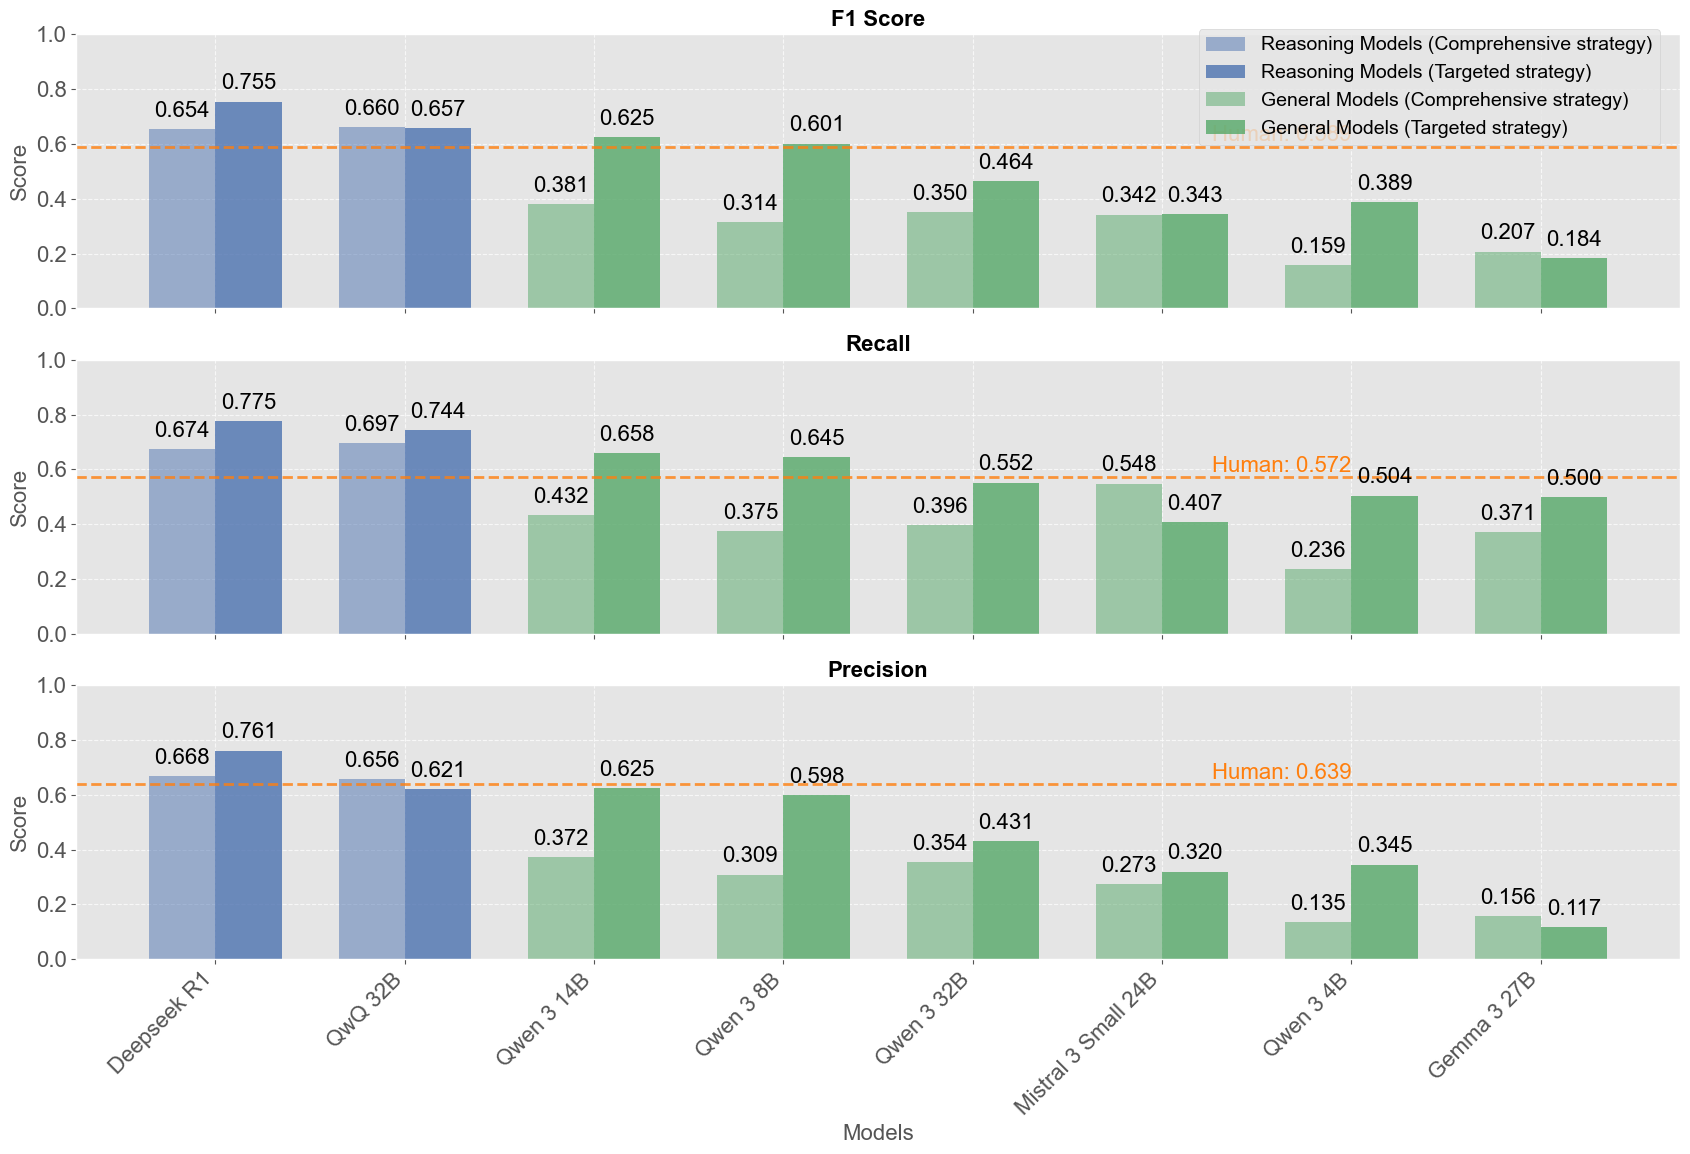

(<Figure size 1700x1200 with 3 Axes>,
 array([<Axes: title={'center': 'F1 Score'}, ylabel='Score'>,
        <Axes: title={'center': 'Recall'}, ylabel='Score'>,
        <Axes: title={'center': 'Precision'}, xlabel='Models', ylabel='Score'>],
       dtype=object),
                   Model                    Type  Precision    Recall  F1_score
 0           Deepseek R1  Comprehensive strategy   0.667808  0.673614  0.653901
 1           Deepseek R1       Targeted strategy   0.761334  0.775277  0.754778
 14              QwQ 32B  Comprehensive strategy   0.656279  0.697016  0.660144
 15              QwQ 32B       Targeted strategy   0.620956  0.744292  0.657306
 6            Qwen 3 14B  Comprehensive strategy   0.371961  0.432453  0.381095
 7            Qwen 3 14B       Targeted strategy   0.625342  0.658366  0.624728
 12            Qwen 3 8B  Comprehensive strategy   0.308733  0.374967  0.314094
 13            Qwen 3 8B       Targeted strategy   0.598402  0.645026  0.601283
 8            Qwe

In [69]:
data = process_data(pd.read_csv("evaluation_dataframes/evaluation_macro_center1.csv"))
plot_strategy_comparison(data, save=True, save_path="figures/Appendix_fig5_compare_strategy_macro.pdf")

## Figure 5C (with data not public)

In [52]:
import json
import os
from transformers import AutoTokenizer

# Load Qwen2.5-7B tokenizer
def load_tokenizer():
    return AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B")

# Load JSON file
def load_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return json.load(f)

# Calculate token count using Qwen2.5-7B tokenizer
def count_tokens(text, tokenizer):
    tokens = tokenizer.encode(text)
    return len(tokens)

# Count tokens per item
def count_tokens_per_item(x: dict, tokenizer):
    for case_id, value in x.items():
        if isinstance(value, str):
            x[case_id] = count_tokens(value, tokenizer)
        elif isinstance(value, dict):
            x[case_id] = 0
            for _, sub_value in value.items():
                if isinstance(sub_value, str):
                    x[case_id] += count_tokens(sub_value, tokenizer)
                elif isinstance(sub_value, dict):
                    for _, sub_sub_value in sub_value.items():
                        if isinstance(sub_sub_value, str):
                            x[case_id] += count_tokens(sub_sub_value, tokenizer)
    return x

# Main function to calculate token counts for each case
def calculate_token_counts(data_path_compreh, data_path_targeted):
    
    # Load prompt data
    prompts_compreh = load_json_file(data_path_compreh)
    prompts_targeted = load_json_file(data_path_targeted)
    
    # Load Qwen2.5-7B tokenizer
    tokenizer = load_tokenizer()
    
    # Dictionary to store token counts
    token_counts = {
        "compreh": {},
        "targeted": {}
    }
    
    # Count tokens per item
    token_counts["compreh"] = count_tokens_per_item(prompts_compreh, tokenizer)
    token_counts["targeted"] = count_tokens_per_item(prompts_targeted, tokenizer)
    
    # Calculate statistics
    compreh_tokens = list(token_counts["compreh"].values())
    targeted_tokens = list(token_counts["targeted"].values())
    
    print(f"Comprehensive Prompts - Total cases: {len(compreh_tokens)}")
    print(f"Min tokens: {min(compreh_tokens)}, Max tokens: {max(compreh_tokens)}, Avg tokens: {sum(compreh_tokens)/len(compreh_tokens):.2f}")
    
    print(f"\nTargeted Prompts - Total cases: {len(targeted_tokens)}")
    print(f"Min tokens: {min(targeted_tokens)}, Max tokens: {max(targeted_tokens)}, Avg tokens: {sum(targeted_tokens)/len(targeted_tokens):.2f}")
    
    # Convert results to DataFrame and save
    compreh_df = pd.DataFrame(list(token_counts["compreh"].items()), 
                             columns=["case_id", "token_count"])
    compreh_df["type"] = "comprehensive"
    
    targeted_df = pd.DataFrame(list(token_counts["targeted"].items()), 
                              columns=["case_id", "token_count"])
    targeted_df["type"] = "targeted"
    
    # Concatenate the two DataFrames
    token_df = pd.concat([compreh_df, targeted_df], ignore_index=True)
    
    # # Save as CSV file
    # token_df.to_csv("qwen_token_counts.csv", index=False)
    
    # # Print confirmation
    # print("\nToken counts saved to qwen_token_counts.csv")
    
    return token_df

In [53]:
# count prompts tokens
prompts_path_compreh = "../../prompts/comprehensive_prompts.json"
prompts_path_targeted = "../../prompts/targted_prompts.json"
prompt_consumption_df = calculate_token_counts(prompts_path_compreh, prompts_path_targeted)

# count output tokens (general model)
outputs_path_compreh = "../../results/raw/qwen3_14B_comphrehensive_1.json"
outputs_path_targeted = "../../results/raw/qwen3_14B_targeted_1.json"
outputs_comsumption_df = calculate_token_counts(outputs_path_compreh, outputs_path_targeted)

# count output tokens (reasoning model)
outputs_reasoning_path_compreh = "../../results/raw/ds_r1_comprehensive_promote.json"
outputs_reasoning_path_targeted = "../../results/raw/ds_r1_targeted_after.json"
outputs_reasoning_comsumption_df = calculate_token_counts(outputs_reasoning_path_compreh, outputs_reasoning_path_targeted)



综合性Prompts - 总病例数: 146
最小token数: 3898, 最大token数: 14753, 平均token数: 6988.58

针对性Prompts - 总病例数: 146
最小token数: 33274, 最大token数: 272084, 平均token数: 101266.81
综合性Prompts - 总病例数: 146
最小token数: 50, 最大token数: 931, 平均token数: 240.91

针对性Prompts - 总病例数: 146
最小token数: 3491, 最大token数: 7036, 平均token数: 4765.45
综合性Prompts - 总病例数: 146
最小token数: 491, 最大token数: 2840, 平均token数: 1301.65

针对性Prompts - 总病例数: 149
最小token数: 11204, 最大token数: 20617, 平均token数: 14272.62


In [72]:
# Plot box plots for token consumption
def plot_token_consumption(prompt_df, output_df, reasoning_df, save_path=None):
    """
    Plots box plots for token consumption of three different types, with each type
    represented in a separate subplot (panel), arranged vertically.
    
    Parameters:
    prompt_df: Token count data for prompts.
    output_df: Token count data for general model outputs.
    reasoning_df: Token count data for reasoning model outputs.
    save_path: Path to save the plot image; defaults to not saving.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from matplotlib.patches import Patch
    from scipy.stats import mannwhitneyu  # Import Mann-Whitney U test
    
    # Set plot style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Create figure and three vertically arranged subplots
    fig, axes = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
    
    # Define colors
    comprehensive_color = '#4C72B0'  # Blue for comprehensive
    targeted_color = '#C44E52'      # Red for targeted
    
    # Datasets and titles
    datasets = [
        (prompt_df, "Prompt Tokens", 0),
        (output_df, "General Model Output Tokens", 1),
        (reasoning_df, "Reasoning Model Output Tokens", 2)
    ]
    
    # Iterate through each dataset to create a subplot
    for df, title, i in datasets:
        # Extract data for the current dataset
        comprehensive_data = df[df['type'] == 'comprehensive']['token_count']
        targeted_data = df[df['type'] == 'targeted']['token_count']
        
        # Plot on the current subplot
        ax = axes[i]
        
        # Create box plot positions
        positions = [1, 2]
        
        # Plot box plots
        bp_comp = ax.boxplot([comprehensive_data], positions=[positions[0]], patch_artist=True, 
                          widths=0.5, showcaps=True, showfliers=False,
                          boxprops={'facecolor': comprehensive_color, 'alpha': 0.7, 'edgecolor': 'black', 'linewidth': 2},
                          whiskerprops={'color': 'black', 'linewidth': 2},
                          medianprops={'color': 'black', 'linewidth': 2},
                          capprops={'color': 'black', 'linewidth': 2})
        
        bp_targ = ax.boxplot([targeted_data], positions=[positions[1]], patch_artist=True, 
                          widths=0.5, showcaps=True, showfliers=False,
                          boxprops={'facecolor': targeted_color, 'alpha': 0.7, 'edgecolor': 'black', 'linewidth': 2},
                          whiskerprops={'color': 'black', 'linewidth': 2},
                          medianprops={'color': 'black', 'linewidth': 2},
                          capprops={'color': 'black', 'linewidth': 2})
        
        # Add scatter points
        jitter = 0.1
        scatter_x_comp = np.random.normal(positions[0], jitter, size=len(comprehensive_data))
        scatter_x_targ = np.random.normal(positions[1], jitter, size=len(targeted_data))
        
        ax.scatter(scatter_x_comp, comprehensive_data, color=comprehensive_color, alpha=0.8, s=80, edgecolor='white')
        ax.scatter(scatter_x_targ, targeted_data, color=targeted_color, alpha=0.8, s=80, edgecolor='white')
        
        # Calculate p-value for non-parametric test
        if len(comprehensive_data) > 0 and len(targeted_data) > 0:
            # Perform Mann-Whitney U test
            stat, p_value = mannwhitneyu(comprehensive_data, targeted_data)
            
            # Determine p-value annotation type
            if p_value < 0.001:
                p_text = r'$\it{p}$ < 0.001 ***'
            elif p_value < 0.01:
                p_text = fr'$\it{{p}}$ = {p_value:.3f} **'
            elif p_value < 0.05:
                p_text = fr'$\it{{p}}$ = {p_value:.3f} *'
            else:
                p_text = fr'$\it{{p}}$ = {p_value:.3f} ns'
            
            # Add p-value to the plot
            x_pos = (positions[0] + positions[1]) / 2
            y_max = max(comprehensive_data.max(), targeted_data.max())
            y_min = min(comprehensive_data.min(), targeted_data.min())
            y_range = y_max - y_min
            y_pos = y_max + y_range * 0.1
            
            ax.text(x_pos, y_pos, p_text, horizontalalignment='center',
                    verticalalignment='bottom', fontsize=14, fontweight='bold')
        
        # Add statistical information text (commented out in original, keeping as comment)
        # comp_mean = comprehensive_data.mean()
        # comp_median = comprehensive_data.median()
        # targ_mean = targeted_data.mean()
        # targ_median = targeted_data.median()
        
        # Set style for the current subplot
        ax.set_xticks(positions)
        ax.set_xticklabels(['Comprehensive', 'Targeted'])
        ax.set_title(title, fontsize=16, fontweight='bold')
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Set y-axis label for each subplot
        ax.set_ylabel('Token Consumption per Case', fontsize=14, fontweight='bold')
        
        # Set y-axis limits based on data range
        y_max = max(comprehensive_data.max(), targeted_data.max())
        y_min = min(comprehensive_data.min(), targeted_data.min())
        margin = (y_max - y_min) * 0.2  # Add 20% margin
        ax.set_ylim(y_min - margin, y_max + margin)
    
    # Set x-axis label for the last subplot
    axes[-1].set_xlabel('Strategy', fontsize=14, fontweight='bold')
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Make space for top legend
    
    # Save chart (if path is provided)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    return fig, axes


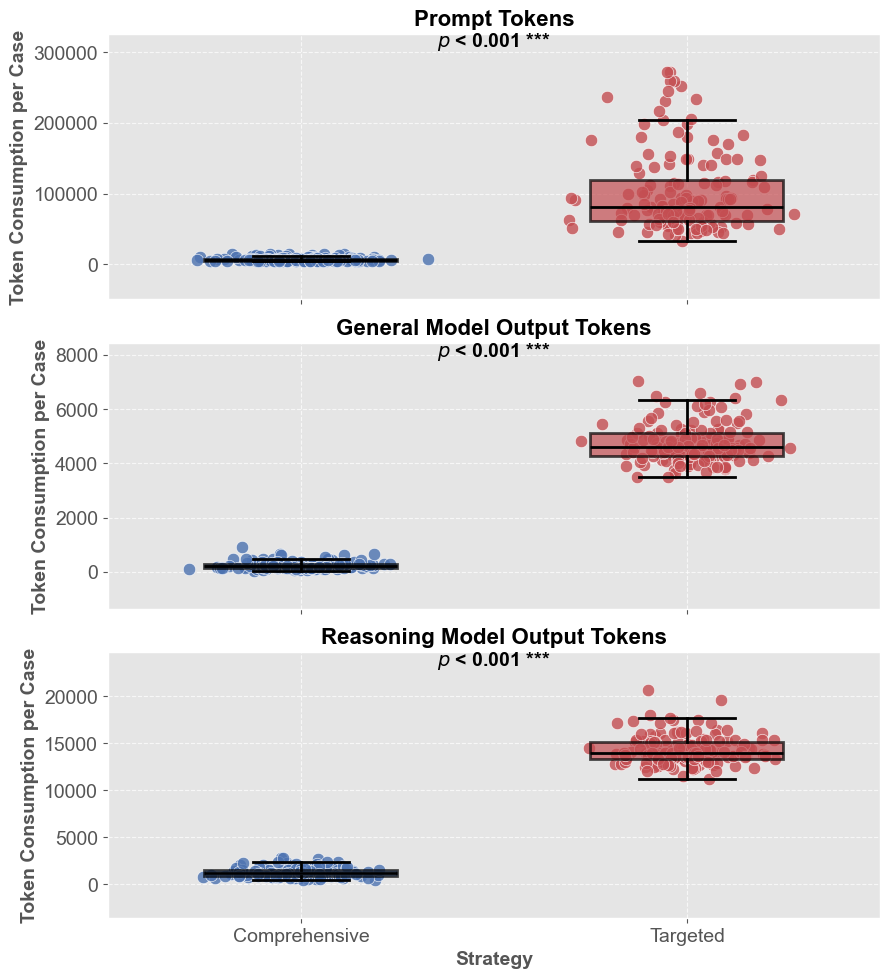

In [73]:

# 绘制token消耗箱型图
fig, axes = plot_token_consumption(
    prompt_consumption_df, 
    outputs_comsumption_df, 
    outputs_reasoning_comsumption_df, 
    save_path="figures/Figure5C_token_consumption.pdf"
)


# Figure 6


## A. Learning curve

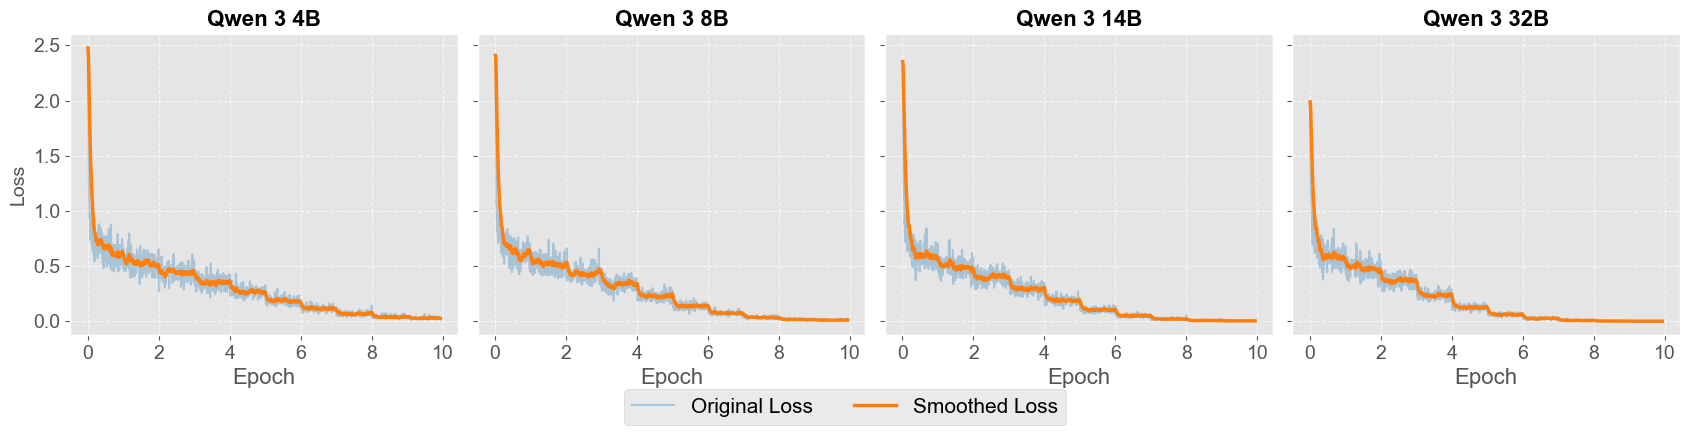

In [70]:
# Read training log files for different models
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to all model log files
log_paths = {
    "Qwen 3 4B": "evaluation_dataframes/qwen4B_train_log.jsonl",
    "Qwen 3 8B": "evaluation_dataframes/qwen8B_train_log.jsonl",
    "Qwen 3 14B": "evaluation_dataframes/qwen14B_train_log.jsonl",
    "Qwen 3 32B": "evaluation_dataframes/qwen32B_train_log.jsonl"
}

# Function to load and process log data
def load_training_logs(file_path):
    training_logs = []
    with open(file_path, 'r') as f:
        for line in f:
            training_logs.append(json.loads(line))
    
    # Convert to DataFrame
    df = pd.DataFrame(training_logs)
    
    # Apply exponential weighted moving average for smoothing
    window = 15
    df['smoothed_loss'] = df['loss'].ewm(span=window, adjust=False).mean()
    df['smoothed_loss'] = df['smoothed_loss'].fillna(df['loss'])
    
    return df

# Set plotting style
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Arial'

# Create a figure with 1x4 subplots
fig, axes = plt.subplots(1, 4, figsize=(17, 4), sharey=True)

# Plot each model's learning curve
for i, (model_name, log_path) in enumerate(log_paths.items()):
    try:
        df_logs = load_training_logs(log_path)
        
        # Plot original loss (semi-transparent)
        axes[i].plot(df_logs['epoch'], df_logs['loss'], alpha=0.3, color='#1f77b4', label='Original Loss')
        
        # Plot smoothed loss
        axes[i].plot(df_logs['epoch'], df_logs['smoothed_loss'], linewidth=2.5, color='#ff7f0e', label='Smoothed Loss')
        
        # Set title and labels
        axes[i].set_title(model_name, fontsize=16, fontweight='bold')
        axes[i].set_xlabel('Epoch', fontsize=16)
        
        # Add y-label only to the first subplot
        if i == 0:
            axes[i].set_ylabel('Loss', fontsize=14)
        
        # Add grid
        axes[i].grid(True, linestyle='--', alpha=0.7)
        
        # Set tick parameters
        axes[i].tick_params(axis='both', which='major', labelsize=14)
        
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error loading data:\n{str(e)}", 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(model_name, fontsize=16, fontweight='bold')

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.04),
           fancybox=True, shadow=False, ncol=2, fontsize=15)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the legend at the bottom

# Save the figure
plt.savefig('figures/figure6A_learning_curves.pdf', dpi=300, bbox_inches='tight')
plt.show()


### B. Targeted stragegy + LoRA


In [82]:
# Pre-process data
import pandas as pd

evaluation_micro_center1 = pd.read_csv("evaluation_dataframes/evaluation_micro_val_center1.csv")
evaluation_micro_center1["Models"] = "center1_" + evaluation_micro_center1["Models"]
evaluation_micro_center2 = pd.read_csv("evaluation_dataframes/evaluation_micro_center2.csv")
evaluation_micro_center2["Models"] = "center2_" + evaluation_micro_center2["Models"]
evaluation_micro = pd.concat([evaluation_micro_center1, evaluation_micro_center2])
evaluation_micro

# Generate model names using list comprehension and loops
model_sizes = ["4B", "8B", "14B", "32B"]
strategies = ["comprehensive", "targeted", "targeted_sft"]
sources = ["center1", "center2"]
runs = range(1, 6)  # 1 to 5

filted_models = [
    f"{source}_qwen3_{size}_{strategy}_{run}"
    for source in sources
    for size in model_sizes
    for strategy in strategies
    for run in runs
]
filted_models.extend(["center1_human", "center2_human"])
evaluation_micro = evaluation_micro[evaluation_micro["Models"].isin(filted_models)]
evaluation_micro["Models"].tolist()
def model_size(model_name):
    if "_4B_" in model_name:
        return "4B"
    elif "_8B_" in model_name:
        return "8B"
    elif "_14B_" in model_name:
        return "14B"
    elif "_32B_" in model_name:
        return "32B"
    else:
        return None

def model_strategy(model_name):
    if "_comprehensive_" in model_name:
        return "Comprehensive"
    elif "_targeted_sft_" in model_name:
        return "Targeted + LoRa"
    elif "_targeted_" in model_name:
        return "Targeted"
    else:
        return None

def source(model_name):
    if "center2_" in model_name:
        return "Center 2"
    elif "center1_" in model_name:
        return "Center 1"
    else:
        raise ValueError(f"Unknown model name: {model_name}")


evaluation_micro["model_size"] = evaluation_micro["Models"].apply(model_size)
evaluation_micro["strategy"] = evaluation_micro["Models"].apply(model_strategy)
evaluation_micro["source"] = evaluation_micro["Models"].apply(source)
evaluation_micro


Models  Precision    Recall  F1_score  \
31                      center1_human   0.593220  0.472973  0.526316   
38  center1_qwen3_14B_comprehensive_1   0.357143  0.405405  0.379747   
39  center1_qwen3_14B_comprehensive_2   0.397590  0.445946  0.420382   
40  center1_qwen3_14B_comprehensive_3   0.418919  0.418919  0.418919   
41  center1_qwen3_14B_comprehensive_4   0.425000  0.459459  0.441558   
..                                ...        ...       ...       ...   
62    center2_qwen3_8B_targeted_sft_1   0.697368  0.716216  0.706667   
63    center2_qwen3_8B_targeted_sft_2   0.769231  0.810811  0.789474   
64    center2_qwen3_8B_targeted_sft_3   0.716216  0.716216  0.716216   
65    center2_qwen3_8B_targeted_sft_4   0.756410  0.797297  0.776316   
66    center2_qwen3_8B_targeted_sft_5   0.746479  0.716216  0.731034   

   model_size         strategy    source  
31       None             None  Center 1  
38        14B    Comprehensive  Center 1  
39        14B    Comprehensive  Center 1  
40        14B    Comprehensive  Center 1  
41        14B    Comprehensive  Center 1  
..        ...              ...       ...  
62         8B  Targeted + LoRa  Center 2  
63         8B  Targeted + LoRa  Center 2  
64         8B  Targeted + LoRa  Center 2  
65         8B  Targeted + LoRa  Center 2  
66         8B  Targeted + LoRa  Center 2  

[122 rows x 7 columns]

In [83]:
def plot_metrics_by_model_size_and_strategy(data, save_path=None):
    """
    Plots box plots grouped by model size and strategy, with each source
    as a separate subplot (panel) arranged vertically.
    Includes F1 Score, Recall, and Precision metrics, sharing the y-axis.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D
    
    # Set style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Create figure and a 2x3 subplot layout, sharing y-axis
    fig, axes = plt.subplots(2, 3, figsize=(17, 10), sharex=True, sharey=True)
    
    # Define colors
    comprehensive_color = '#4C72B0'
    targeted_color = '#C44E52'
    lora_color =  "#893996"    
    human_color = '#ff7f0e'  
    
    # Get unique source values
    sources = data['source'].unique()
    
    # Model size order
    model_size_order = ['4B', '8B', '14B', '32B']
    strategies = ['Comprehensive', 'Targeted', 'Targeted + LoRa']
    
    # Calculate base positions for each model size
    base_positions = {size: i*3 for i, size in enumerate(model_size_order)}
    
    # Add offset for each strategy from the base position
    strategy_offsets = {
        'Comprehensive': -0.6,
        'Targeted': 0,
        'Targeted + LoRa': 0.6
    }
    
    # Strategy color mapping
    strategy_colors = {
        'Comprehensive': comprehensive_color,
        'Targeted': targeted_color,
        'Targeted + LoRa': lora_color
    }
    
    # List of metrics
    metrics = ['F1_score', 'Recall', 'Precision']
    
    # Iterate through each source and metric
    for i, source in enumerate(sources):
        # Extract data for the current source
        source_data = data[data['source'] == source]
        
        # Get human data for the current source
        human_data = source_data[source_data['Models'].str.contains('human')]
        
        for j, metric in enumerate(metrics):
            # Set current subplot
            ax = axes[i, j]
            
            # Get human metric value
            human_value = human_data[metric].values[0] if len(human_data) > 0 else None
            
            # Store all positions and data for adding scatter points later
            all_positions = []
            all_values = []
            all_colors = []
            
            # Plot box plots for each metric by model size
            for model_size in model_size_order:
                model_data = source_data[source_data['model_size'] == model_size]
                
                # Skip if no data for this model size
                if len(model_data) == 0:
                    continue
                
                # Plot box plots for each strategy
                for strategy in strategies:
                    strategy_data = model_data[model_data['strategy'] == strategy]
                    
                    # Skip if no data for this strategy
                    if len(strategy_data) == 0:
                        continue
                    
                    # Calculate position
                    pos = base_positions[model_size] + strategy_offsets[strategy]
                    
                    # Extract metric values
                    values = strategy_data[metric].values
                    
                    # Draw box plot
                    bp = ax.boxplot([values], positions=[pos], patch_artist=False, widths=0.5, 
                                  showcaps=True, showfliers=False, 
                                  boxprops={'color': strategy_colors[strategy], 'linewidth': 2},
                                  whiskerprops={'color': strategy_colors[strategy], 'linewidth': 2},
                                  medianprops={'color': strategy_colors[strategy], 'linewidth': 2},
                                  capprops={'color': strategy_colors[strategy], 'linewidth': 2})
                    
                    # Store positions and values for adding scatter points later
                    scatter_x = np.repeat(pos, len(values)) + np.random.normal(0, 0.05, size=len(values))
                    all_positions.extend(scatter_x)
                    all_values.extend(values)
                    all_colors.extend([strategy_colors[strategy]] * len(values))
            
            # Add scatter points
            ax.scatter(all_positions, all_values, c=all_colors, alpha=0.8, s=30, edgecolor='white')
            
            # Add Human metric horizontal line
            if human_value is not None:
                ax.axhline(y=human_value, color=human_color, linestyle='--', linewidth=2)
                ax.text(ax.get_xlim()[1] - 3, human_value + 0.01, f'{human_value:.3f}', 
                       color=human_color, fontsize=12, fontweight='bold')
            
            # Set x-axis ticks
            ax.set_xticks([base_positions[size] for size in model_size_order])
            ax.set_xticklabels(model_size_order, fontsize=14)
            # Set y-axis ticks
            ax.tick_params(axis='y', labelsize=14)
            
            # Set title and labels
            if i == 0:  # Set metric title only for the first row
                ax.set_title(metric.replace('_', ' ').title(), fontsize=18, fontweight='bold')
            
            if j == 0:  # Set Center title only for the first column
                ax.set_ylabel(f'Center {i+1}', fontsize=16, fontweight='bold')
            
            # Set grid lines
            ax.grid(True, linestyle='--', alpha=0.7)
            
            # Set x-axis label only for the subplots in the last row
            if i == len(sources) - 1:
                ax.set_xlabel('Model Size', fontsize=16, fontweight='bold')
    
    # Add common legend at the top
    legend_elements = [
        Patch(facecolor=comprehensive_color, edgecolor='black', linewidth=0, label='Comprehensive strategy'),
        Patch(facecolor=targeted_color, edgecolor='black', linewidth=0, label='Targeted strategy'),
        Patch(facecolor=lora_color, edgecolor='black', linewidth=0, label='Targeted strategy + LoRa'),
        Line2D([0], [0], color=human_color, linestyle='--', linewidth=2, label='Human performance')
    ]
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.1),
               fancybox=True, shadow=False, ncol=4, fontsize=14)
    
    # Adjust layout
    plt.tight_layout()
    # Reduce horizontal spacing to bring the three panels in a row closer
    plt.subplots_adjust(top=0.95, hspace=0.2, wspace=0.05)  # Reduced wspace from 0.2 to 0.05
    
    # Save plot (if path is provided)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig, axes


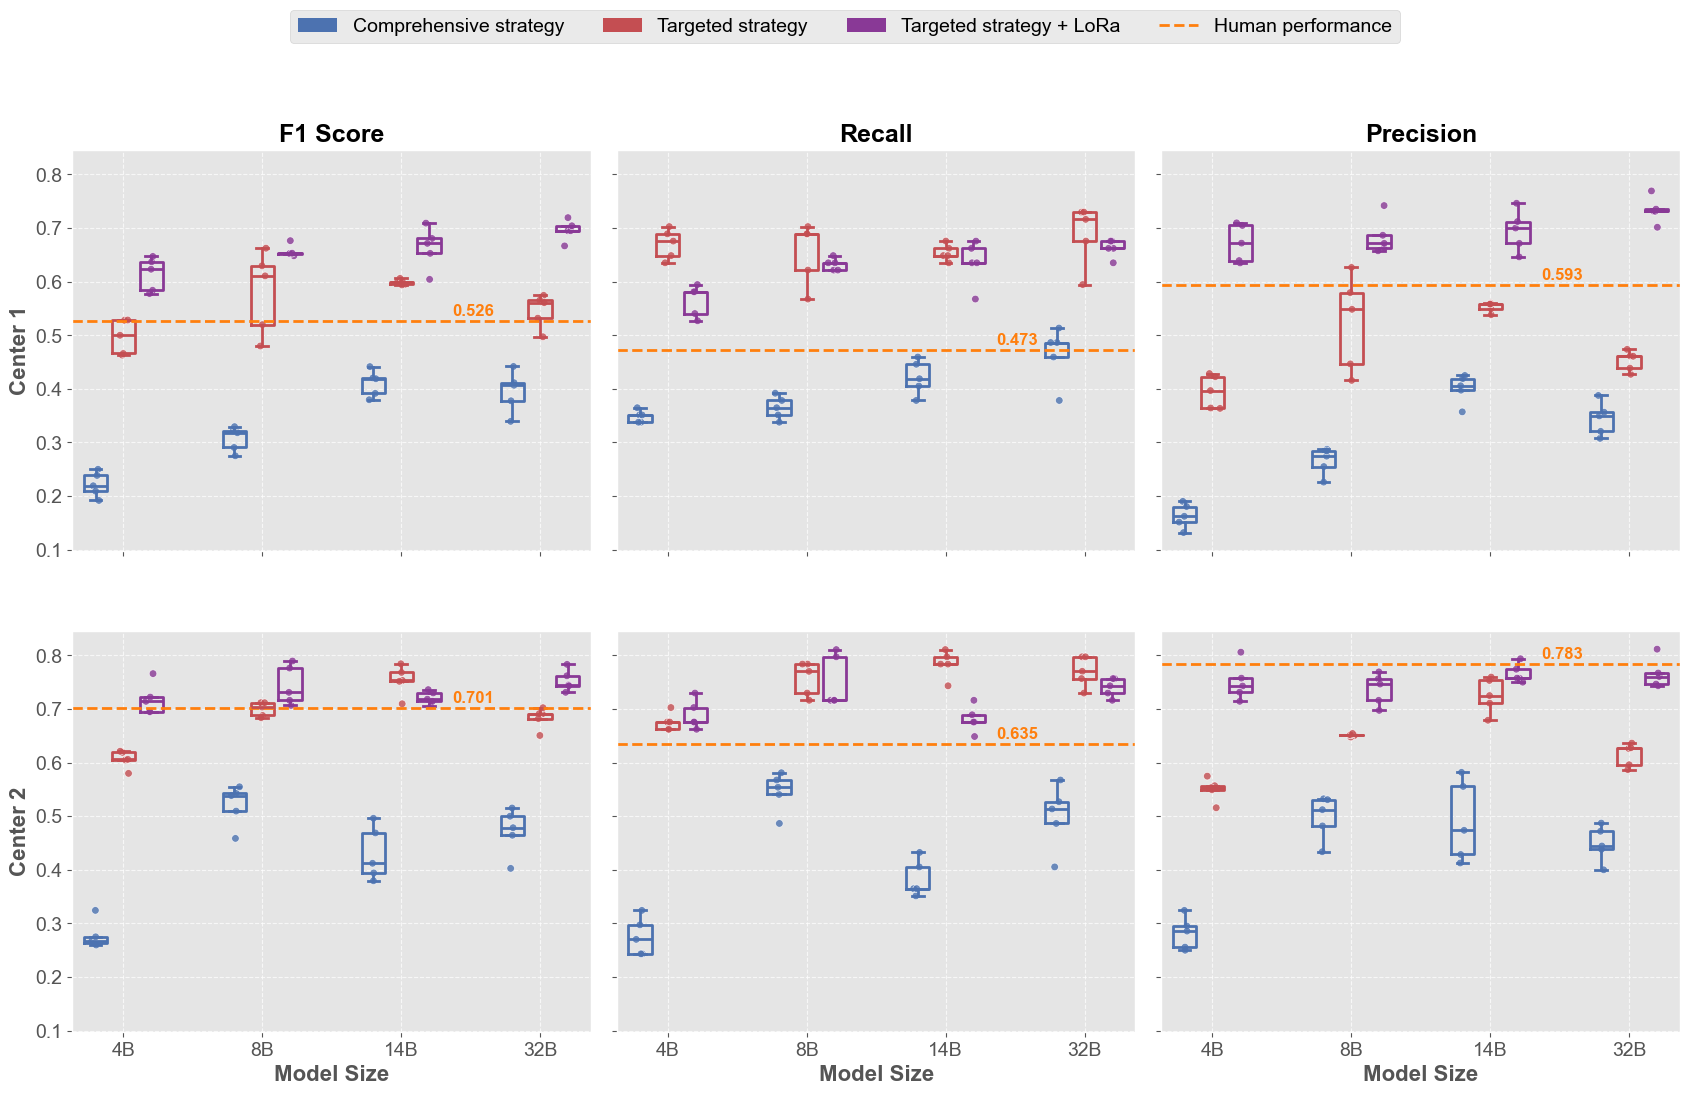

In [84]:

# 绘制图表
fig, axes = plot_metrics_by_model_size_and_strategy(evaluation_micro, save_path='figures/figure6b_targeted_lora.pdf')
# plt.show()


### Appendix 6

In [85]:
# Pre-process data
import pandas as pd

evaluation_macro_center1 = pd.read_csv("evaluation_dataframes/evaluation_macro_val_center1.csv")
evaluation_macro_center1["Models"] = "center1_" + evaluation_macro_center1["Models"]
evaluation_macro_center2 = pd.read_csv("evaluation_dataframes/evaluation_macro_center2.csv")
evaluation_macro_center2["Models"] = "center2_" + evaluation_macro_center2["Models"]
evaluation_macro = pd.concat([evaluation_macro_center1, evaluation_macro_center2])
evaluation_macro

# Generate model names using list comprehension and loops
model_sizes = ["4B", "8B", "14B", "32B"]
strategies = ["comprehensive", "targeted", "targeted_sft"]
sources = ["center1", "center2"]
runs = range(1, 6)  # 1 to 5

filted_models = [
    f"{source}_qwen3_{size}_{strategy}_{run}"
    for source in sources
    for size in model_sizes
    for strategy in strategies
    for run in runs
]
filted_models.extend(["center1_human", "center2_human"])
evaluation_macro = evaluation_macro[evaluation_macro["Models"].isin(filted_models)]
evaluation_macro["Models"].tolist()
def model_size(model_name):
    if "_4B_" in model_name:
        return "4B"
    elif "_8B_" in model_name:
        return "8B"
    elif "_14B_" in model_name:
        return "14B"
    elif "_32B_" in model_name:
        return "32B"
    else:
        return None

def model_strategy(model_name):
    if "_comprehensive_" in model_name:
        return "Comprehensive"
    elif "_targeted_sft_" in model_name:
        return "Targeted + LoRa"
    elif "_targeted_" in model_name:
        return "Targeted"
    else:
        return None

def source(model_name):
    if "center2_" in model_name:
        return "Center 2"
    elif "center1_" in model_name:
        return "Center 1"
    else:
        raise ValueError(f"Unknown model name: {model_name}")


evaluation_macro["model_size"] = evaluation_macro["Models"].apply(model_size)
evaluation_macro["strategy"] = evaluation_macro["Models"].apply(model_strategy)
evaluation_macro["source"] = evaluation_macro["Models"].apply(source)
evaluation_macro


Models  Precision    Recall  F1_score  \
31                      center1_human   0.572464  0.508696  0.521014   
38  center1_qwen3_14B_comprehensive_1   0.387923  0.407246  0.374017   
39  center1_qwen3_14B_comprehensive_2   0.372464  0.436232  0.386473   
40  center1_qwen3_14B_comprehensive_3   0.390580  0.407246  0.381677   
41  center1_qwen3_14B_comprehensive_4   0.393116  0.443478  0.389061   
..                                ...        ...       ...       ...   
62    center2_qwen3_8B_targeted_sft_1   0.742262  0.738782  0.722039   
63    center2_qwen3_8B_targeted_sft_2   0.854167  0.875962  0.841825   
64    center2_qwen3_8B_targeted_sft_3   0.779167  0.795833  0.766453   
65    center2_qwen3_8B_targeted_sft_4   0.826923  0.847115  0.819984   
66    center2_qwen3_8B_targeted_sft_5   0.793590  0.782372  0.764560   

   model_size         strategy    source  
31       None             None  Center 1  
38        14B    Comprehensive  Center 1  
39        14B    Comprehensive  Center 1  
40        14B    Comprehensive  Center 1  
41        14B    Comprehensive  Center 1  
..        ...              ...       ...  
62         8B  Targeted + LoRa  Center 2  
63         8B  Targeted + LoRa  Center 2  
64         8B  Targeted + LoRa  Center 2  
65         8B  Targeted + LoRa  Center 2  
66         8B  Targeted + LoRa  Center 2  

[122 rows x 7 columns]

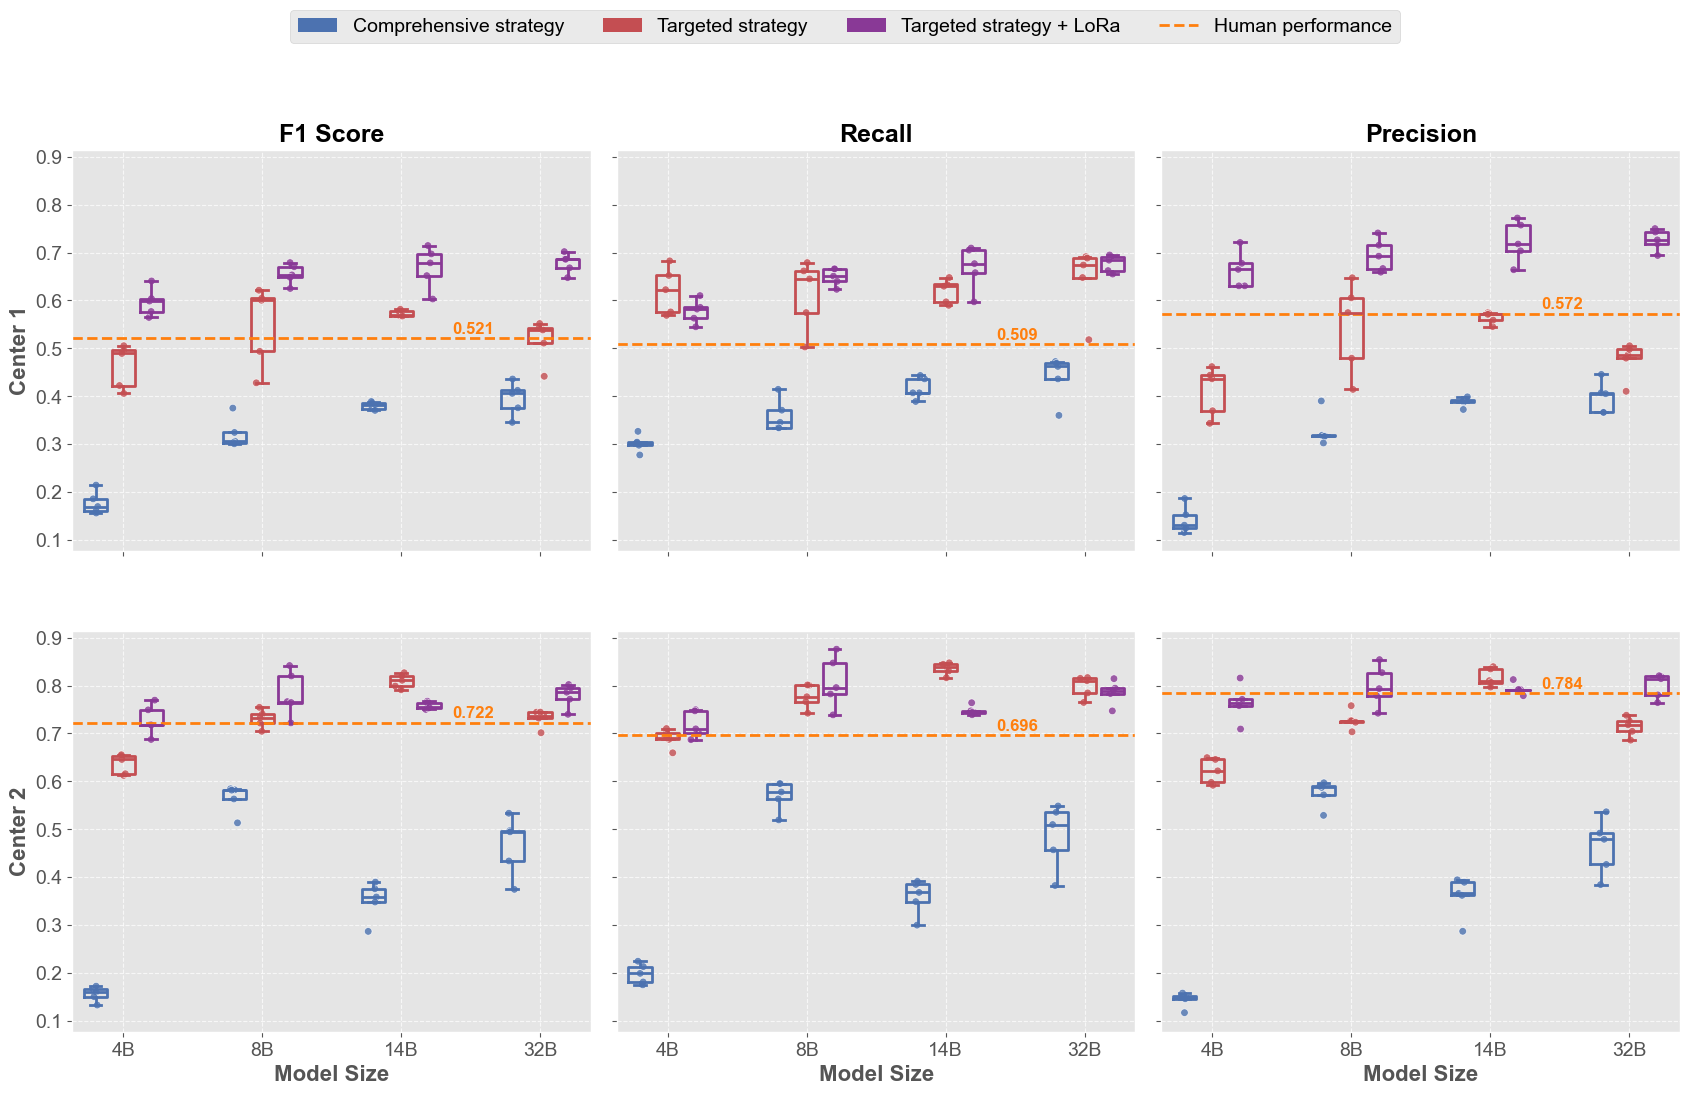

In [86]:
# 绘制图表
fig, axes = plot_metrics_by_model_size_and_strategy(evaluation_macro, save_path='figures/Appendix_fig6_metrics_by_model_size_and_strategy_macro.pdf')
plt.show()

# Figure 7 加入grading

需要包括进去的模型

- human
- deepseek r1
- gemeni 2.5 pro
- gemini 2.3 flash
- o1
- qwq
- qwen3 4B targeted + lora
- qwen3 8B targeted +  lora
- qwen3 14B targeted + lora
- qwen3 32B targeted + lora


In [98]:
# Pre-process
import pandas as pd

evaluation_strict_center1 = pd.read_csv("evaluation_dataframes/evaluation_micro_val_center1_strict.csv")

evaluation_strict_center1["source"] = "Center 1"
import pandas as pd

evaluation_strict_center2 = pd.read_csv("evaluation_dataframes/evaluation_micro_center2_strict.csv")
evaluation_strict_center2["source"] = "Center 2"
evaluation_strict_center2
evaluation_strict = pd.concat([evaluation_strict_center1, evaluation_strict_center2])
evaluation_strict['Models'] = evaluation_strict['Models'].str.replace('modified_', '', regex=False)
evaluation_strict

Models  Precision    Recall  F1_score  \
0             ds_r1_comprehensive_strict   0.594203  0.554054  0.573427   
1  gemini_2_5_flash_comprehensive_strict   0.626667  0.635135  0.630872   
2    gemini_2_5_pro_comprehensive_strict   0.333333  0.445946  0.381503   
3                           human_strict   0.406780  0.324324  0.360902   
4                o1_comprehensive_strict   0.620690  0.486486  0.545455   
5        qwen3_14B_targeted_sft_1_strict   0.500000  0.459459  0.478873   
6        qwen3_32B_targeted_sft_1_strict   0.602941  0.554054  0.577465   
7         qwen3_4B_targeted_sft_1_strict   0.453125  0.391892  0.420290   
8         qwen3_8B_targeted_sft_1_strict   0.583333  0.567568  0.575342   
9      qwq32B_comprehensive_sft_1_strict   0.603448  0.472973  0.530303   
0             ds_r1_comprehensive_strict   0.671233  0.662162  0.666667   
1  gemini_2_5_flash_comprehensive_strict   0.701299  0.729730  0.715232   
2    gemini_2_5_pro_comprehensive_strict   0.597701  0.702703  0.645963   
3                           human_strict   0.766667  0.621622  0.686567   
4                o1_comprehensive_strict   0.811321  0.581081  0.677165   
5        qwen3_14B_targeted_sft_1_strict   0.698413  0.594595  0.642336   
6        qwen3_32B_targeted_sft_1_strict   0.671233  0.662162  0.666667   
7         qwen3_4B_targeted_sft_1_strict   0.642857  0.608108  0.625000   
8         qwen3_8B_targeted_sft_1_strict   0.578947  0.445946  0.503817   
9      qwq32B_comprehensive_sft_1_strict   0.774194  0.648649  0.705882   

     source  
0  Center 1  
1  Center 1  
2  Center 1  
3  Center 1  
4  Center 1  
5  Center 1  
6  Center 1  
7  Center 1  
8  Center 1  
9  Center 1  
0  Center 2  
1  Center 2  
2  Center 2  
3  Center 2  
4  Center 2  
5  Center 2  
6  Center 2  
7  Center 2  
8  Center 2  
9  Center 2

In [99]:
# Model name match
name_match = {
    "ds_r1_comprehensive_strict": "Deepseek R1",
    "gemini_2_5_flash_comprehensive_strict": "Gemini 2.5 Flash",
    "gemini_2_5_pro_comprehensive_strict": "Gemini 2.5 Pro",
    "human_strict": "Human",
    # "o1_comprehensive_modified_strict": "O1",
    "qwen3_4B_targeted_sft_1_strict": "Qwen3-PeriComp 4B",
    "qwen3_8B_targeted_sft_1_strict": "Qwen3-PeriComp 8B",
    "qwen3_14B_targeted_sft_1_strict": "Qwen3-PeriComp 14B",
    "qwen3_32B_targeted_sft_1_strict": "Qwen3-PeriComp 32B",
    "qwq32B_comprehensive_modified_sft_1_strict": "QwQ-PeriComp 32B"
}

In [100]:
def plot_model_performance_strict(evaluation, name_match, save_path='figures/figure1D_no_think.pdf'):
    """
    Plots a comparison of model performance, including F1 Score, Recall, and Precision,
    across two data sources.
    
    Parameters:
    evaluation: DataFrame, containing model evaluation results
    name_match: dict, dictionary for mapping model names
    reasoning_models: list, list of reasoning models (Note: this parameter is not used in the function body)
    save_path: str, path to save the plot
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Set plot style
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'Arial'
    
    # Use Nature-style color scheme
    commercial_color = '#4C72B0' 
    pericomp_color = '#BC65B1'
    human_color = '#FF7F0E' 
    
    # Create a 3x2 subplot grid
    fig, axes = plt.subplots(3, 2, figsize=(17, 15), sharey='row')
    
    metrics = ['F1_score', 'Recall', 'Precision']
    titles = ['F1 Score', 'Recall', 'Precision']
    sources = ['Center 1', 'Center 2']
    source_titles = ['Center 1', 'Center 2']
    
    # Filter data
    evaluation = evaluation[evaluation['Models'].isin(name_match.keys()) | (evaluation['Models'] == 'human_strict')]
    
    for col, source in enumerate(sources):
        # Filter data for the current source
        source_data = evaluation[evaluation['source'] == source].reset_index(drop=True)
        
        # Sort data (descending by F1 score)
        sorted_indices = source_data['F1_score'].argsort()[::-1]
        sorted_evaluation = source_data.iloc[sorted_indices].reset_index(drop=True)
        
        # Use the name_match dictionary to map model names
        model_names = [name_match.get(model, model) for model in sorted_evaluation['Models'].tolist()]
        
        # Plot three subplots
        for i, (metric, title) in enumerate(zip(metrics, titles)):
            # Create bar chart, choosing color based on whether model name contains 'PeriComp'
            bars = axes[i, col].bar(np.arange(len(model_names)), sorted_evaluation[metric], 
                              color=[human_color if model == 'human_strict' else 
                                     pericomp_color if 'PeriComp' in name_match.get(model, model) else commercial_color 
                                     for model in sorted_evaluation['Models']], 
                              alpha=0.8,
                              width=0.7)
            
            # Add value labels on top of bars, rounded to 3 decimal places
            for bar in bars:
                height = bar.get_height()
                axes[i, col].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                             f'{height:.3f}', ha='center', va='bottom', fontsize=14, rotation=0)
            
            # Set chart style
            axes[i, col].set_title(f'{title} - {source_titles[col]}', fontsize=16, fontweight='bold')
            
            # Add y-axis label only for the left column plots
            if col == 0:
                axes[i, col].set_ylabel('Score', fontsize=16)
                
            axes[i, col].set_ylim(0, 1.0)
            axes[i, col].grid(True, linestyle='--', alpha=0.7)
            
            # Find the position and value of 'human'
            if 'human_strict' in sorted_evaluation['Models'].tolist():
                human_index = sorted_evaluation['Models'].tolist().index('human_strict')
                human_value = sorted_evaluation[metric].iloc[human_index]
                
                # Add a horizontal dashed line for the human value
                axes[i, col].axhline(y=human_value, color='#FF7F0E', linestyle='--', linewidth=2, alpha=0.8)
    
            # Set x-axis labels, only display on the bottom subplot
            if i == 2:
                axes[i, col].set_xticks(np.arange(len(model_names)))
                axes[i, col].set_xticklabels(model_names, rotation=45, ha='right', fontsize=15)
                axes[i, col].set_xlabel('Models', fontsize=16)
            else:
                axes[i, col].set_xticks([])
                axes[i, col].set_xticklabels([])
    
    # Set larger y-axis tick font size
    for row in axes:
        for ax in row:
            ax.tick_params(axis='y', labelsize=14)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=commercial_color, label='Commercial Models', alpha=0.8),
        Patch(facecolor=pericomp_color, label='PeriComp Models', alpha=0.8),
        Patch(facecolor=human_color, label='Human', alpha=0.8)
    ]
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.995, 0.95), fontsize=15)
    
    # Add overall title (empty as per original)
    fig.suptitle('')
    
    # Adjust layout
    plt.tight_layout()
    # Reduce horizontal spacing to bring the three panels in a row closer
    plt.subplots_adjust(top=0.95, hspace=0.2, wspace=0.05)  # Reduced wspace from 0.2 to 0.05
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig, axes


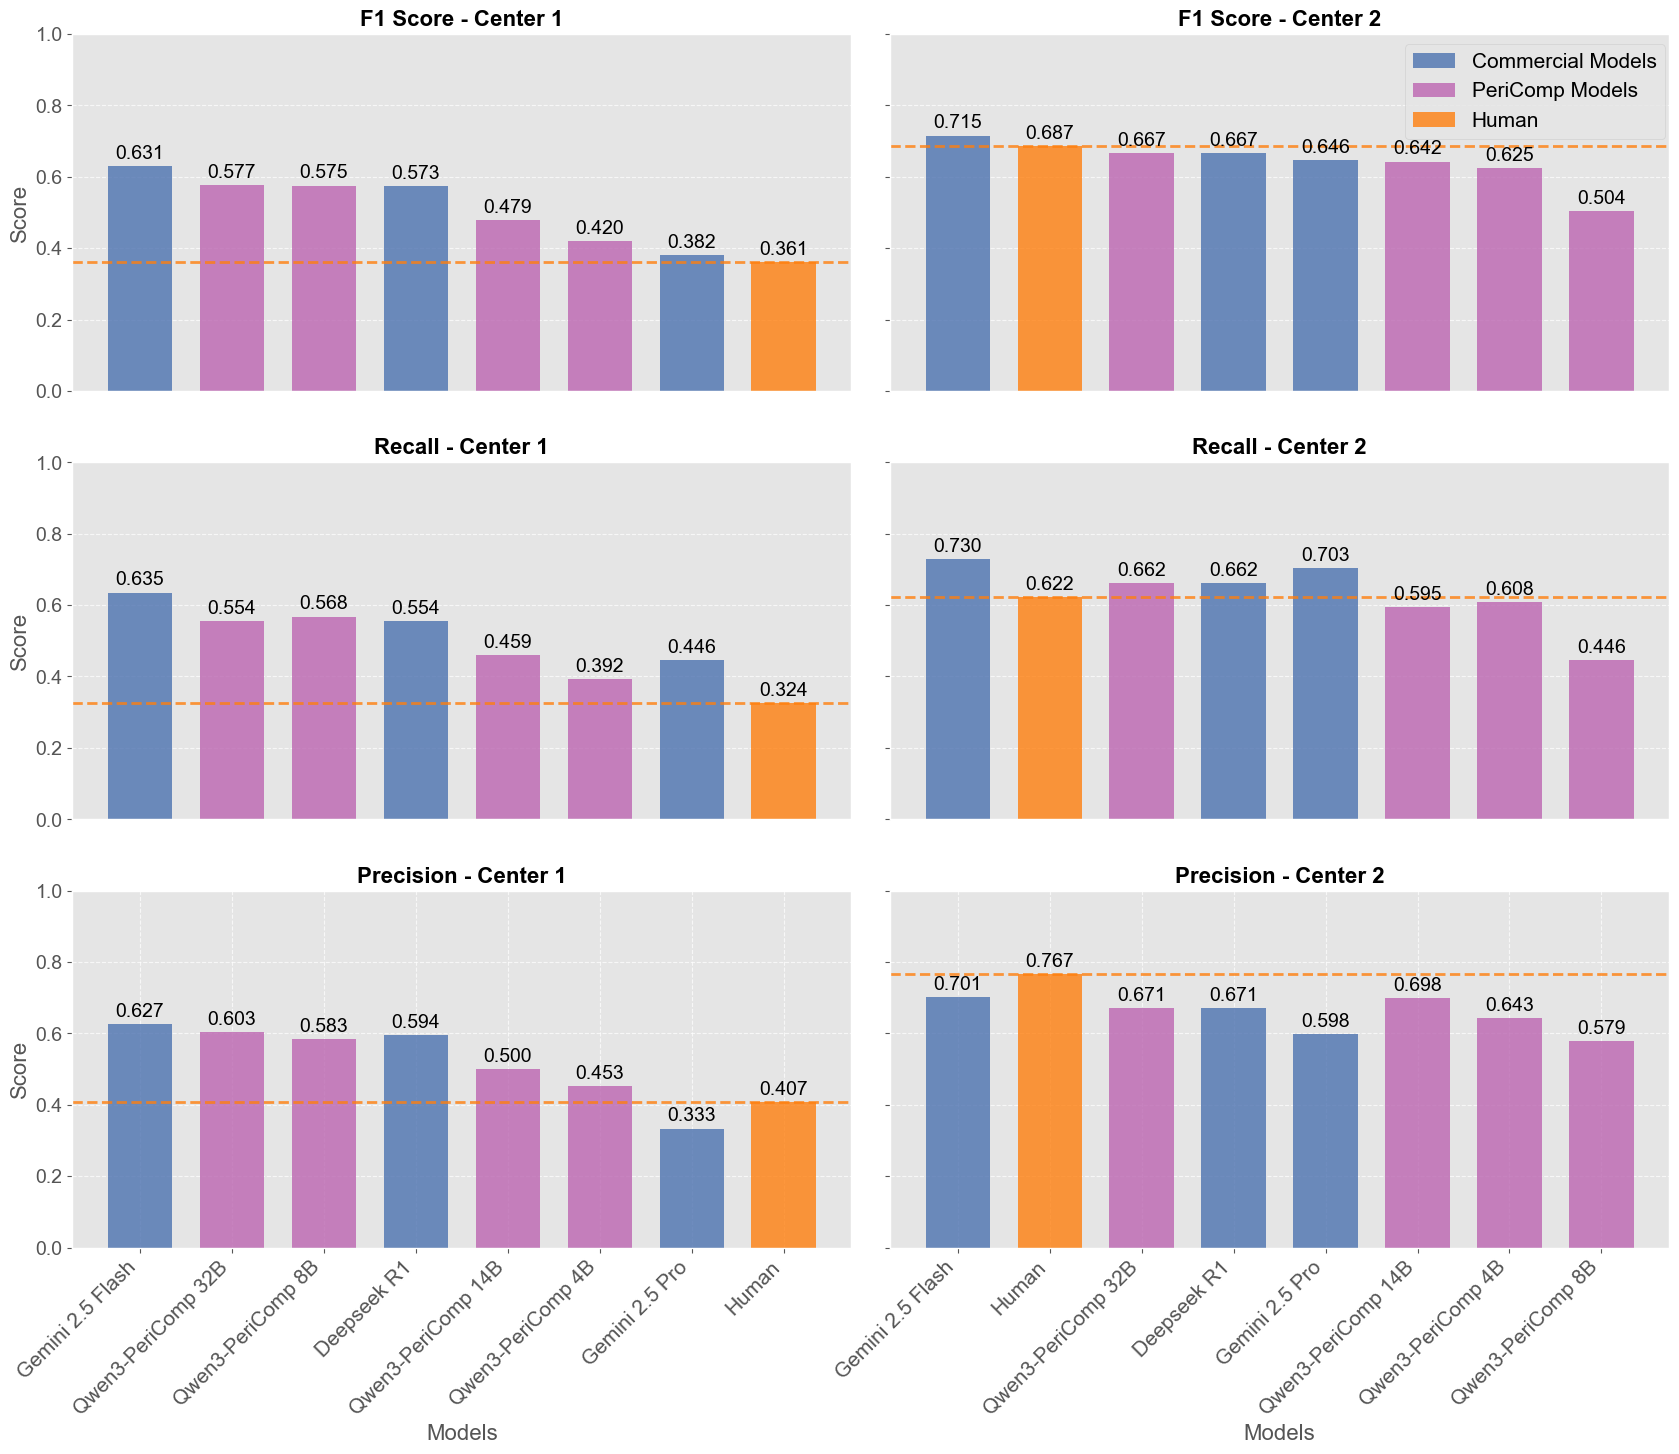

In [101]:
# 绘制图表
fig, axes = plot_model_performance_strict(evaluation_strict, name_match, save_path='figures/figure7_perocomp.pdf')

### Appendix 7


In [102]:
# Pre-process
import pandas as pd

evaluation_strict_center1 = pd.read_csv("evaluation_dataframes/evaluation_macro_val_center1_strict.csv")

evaluation_strict_center1["source"] = "Center 1"
import pandas as pd

evaluation_strict_center2 = pd.read_csv("evaluation_dataframes/evaluation_macro_center2_strict.csv")
evaluation_strict_center2["source"] = "Center 2"
evaluation_strict_center2
evaluation_strict = pd.concat([evaluation_strict_center1, evaluation_strict_center2])
evaluation_strict['Models'] = evaluation_strict['Models'].str.replace('modified_', '', regex=False)
evaluation_strict

Models  Precision    Recall  F1_score  \
0              ds_r1_comprehensive_strict   0.583333  0.544928  0.553830   
1   gemini_2_5_flash_comprehensive_strict   0.624638  0.614493  0.602536   
2     gemini_2_5_pro_comprehensive_strict   0.361594  0.438406  0.385611   
3                                   human   0.420290  0.370290  0.381522   
4                            human_strict   0.420290  0.370290  0.381522   
5                 o1_comprehensive_strict   0.568841  0.494928  0.520652   
6         qwen3_14B_targeted_sft_1_strict   0.519928  0.494928  0.485024   
7         qwen3_32B_targeted_sft_1_strict   0.608696  0.610145  0.583851   
8          qwen3_4B_targeted_sft_1_strict   0.461957  0.436232  0.435438   
9          qwen3_8B_targeted_sft_1_strict   0.587500  0.572464  0.567447   
10      qwq32B_comprehensive_sft_1_strict   0.619565  0.508696  0.535611   
0              ds_r1_comprehensive_strict   0.719551  0.716667  0.713828   
1   gemini_2_5_flash_comprehensive_strict   0.794872  0.789744  0.786538   
2     gemini_2_5_pro_comprehensive_strict   0.678526  0.726282  0.696479   
3                                   human   0.519231  0.519231  0.519231   
4                            human_strict   0.764423  0.676923  0.703022   
5                 o1_comprehensive_strict   0.681090  0.631731  0.646154   
6         qwen3_14B_targeted_sft_1_strict   0.719551  0.689744  0.698214   
7         qwen3_32B_targeted_sft_1_strict   0.764423  0.759295  0.750717   
8          qwen3_4B_targeted_sft_1_strict   0.689744  0.675000  0.677534   
9          qwen3_8B_targeted_sft_1_strict   0.578846  0.575641  0.576923   
10      qwq32B_comprehensive_sft_1_strict   0.807692  0.752244  0.771245   

      source  
0   Center 1  
1   Center 1  
2   Center 1  
3   Center 1  
4   Center 1  
5   Center 1  
6   Center 1  
7   Center 1  
8   Center 1  
9   Center 1  
10  Center 1  
0   Center 2  
1   Center 2  
2   Center 2  
3   Center 2  
4   Center 2  
5   Center 2  
6   Center 2  
7   Center 2  
8   Center 2  
9   Center 2  
10  Center 2

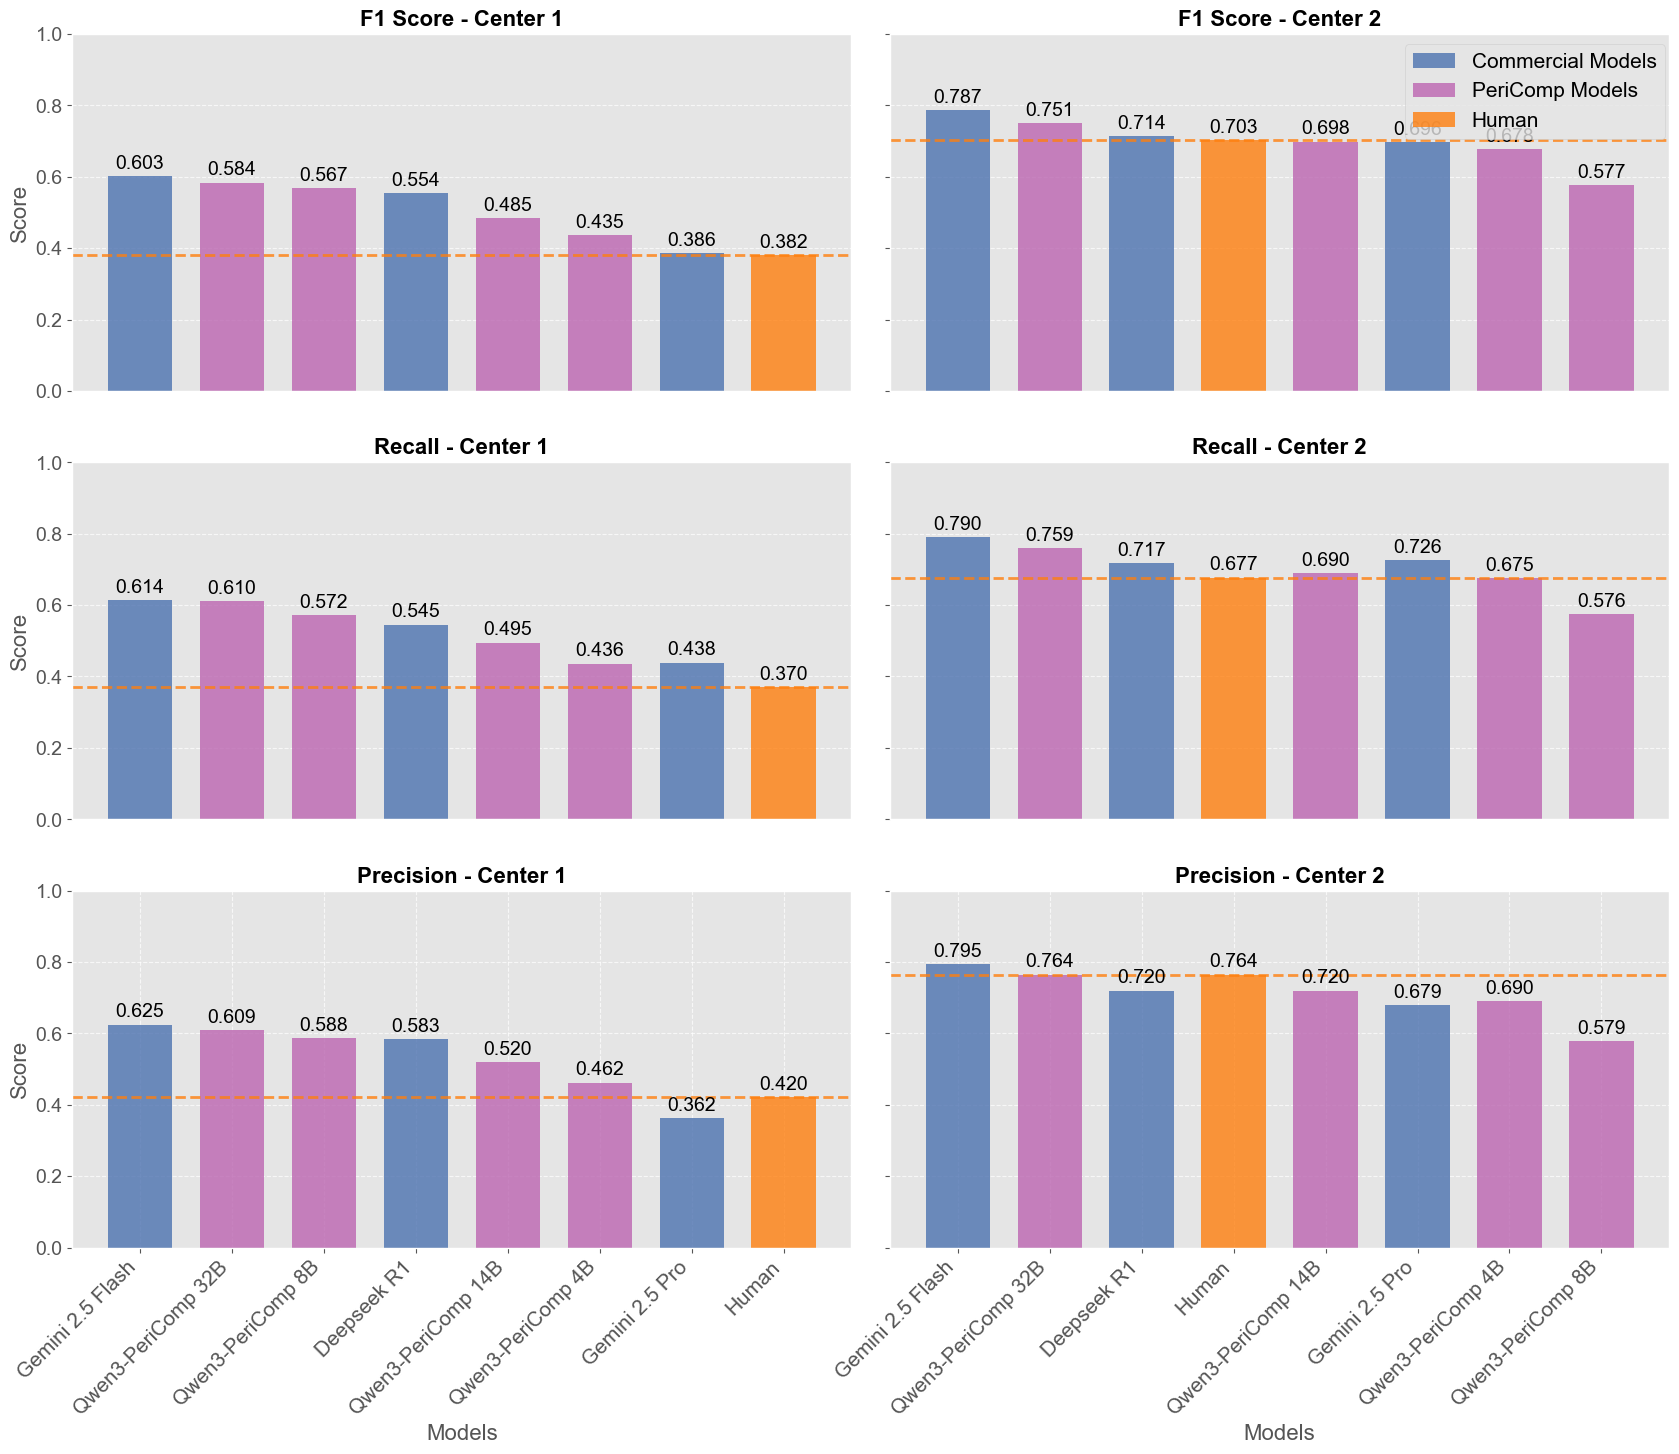

In [103]:
# 绘制图表
fig, axes = plot_model_performance_strict(evaluation_strict, name_match, save_path='figures/appendix_fig7_pericomps_macro.pdf')